<div style="text-align: center; background-color:rgb(32, 5, 129); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 40px; font-weight: bold;">Build and optimize forecasting models to predict future sales</span>
</div>

![](https://raw.githubusercontent.com/kukedlc87/imagenes/main/A%20high-tech.png)

**Car Sales Forecasting**
- Since our target column is **Price ($)**, which is a numeric/continuous value, our problem is a regression problem.
- we're trying to predict the future sale **price** of a car based on features like model, body style, engine type, etc. That’s a classic regression task.
  ---
**Evaluation Metrics:**

**R² (R-squared)** – to see how well the model explains the variance

**MAE / RMSE** – to see how close the predictions are to the actual prices  
- The mean best accuracy and best parameters got through the grid search CV
- The model performance metrics Accuracy, Precision, Recall and F1 Score
- The model Classification scores by classes
- The prediction confusion matrix
- The ROC AUC Score and the ROC Curve
--- 
models are:                                                                                                            
* [Ml Prediction Models](#Ml_Prediction_Models)
1. [Random Forest](#Random_Forest) 
2. [XGBoost](#XGBoost)
3. [Decision Tree](#Decision_Tree)
4. [Gradient Boosting](#Gradient_Boosting)

* [Ml Forecasting Models](#Ml_Forecasting_Models)
1. [prophet](#prophet)
2. [ARIMA](#Arima)
3. [XGBoost](#XGBoost)

In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import STL
import joblib
import time
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, make_scorer, mean_absolute_percentage_error ,f1_score, ConfusionMatrixDisplay ,mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV ,cross_val_predict ,GridSearchCV ,learning_curve
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
from prophet.diagnostics import cross_validation, performance_metrics
from pmdarima.utils import tsdisplay
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

## **Load a dataset**
- Split the dataset into training and test sets, ensuring proper time-series validation techniques
- Use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and test sets. 

In [3]:
cars_sales_Model = joblib.load('./Data/dataModeling.pkl')

In [4]:
cars_sales_Model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23089 entries, 0 to 23089
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  23089 non-null  datetime64[ns]
 1   Annual Income         23089 non-null  float64       
 2   Company               23089 non-null  int64         
 3   Engine                23089 non-null  int64         
 4   Price ($)             23089 non-null  float64       
 5   Body Style            23089 non-null  int64         
 6   Price_to_Income       23089 non-null  float64       
 7   Holiday               23089 non-null  int64         
 8   Is_Holiday            23089 non-null  int64         
 9   Is_Weekend            23089 non-null  int64         
 10  model                 23089 non-null  float64       
 11  Engine_to_Model       23089 non-null  float64       
 12  Income_Bracket        23089 non-null  int64         
 13  Seasonal_Price_Index 

In [5]:
cars_sales_Model.shape

(23089, 16)

# **Ml_Prediction_Models** <a class="anchor" id="Ml_Prediction_Models"></a>
- The goal is to use a machine learning model to predict the price of a car based on its features, such as the model, body style, engine type, etc.

## **Spilit the dataset**

- The `cars_sales_Model` dataset contains features and target variables for a car sales dataset.
- x is the features and y is the target variable(**price ($)**).
  

In [ ]:
cars_sales_Model.columns

Index(['Date', 'Annual Income', 'Company', 'Engine', 'Price ($)', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [ ]:
# Define features (X) and target (y)
x = cars_sales_Model.drop(columns=['Price ($)','Date'])
y = cars_sales_Model['Price ($)']
# Split data into training and testing sets
pca = PCA(n_components=5)  # Ajusta el número de componentes según tu elección
X_pca = pca.fit_transform(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18471, 5)
(4618, 5)
(18471,)
(4618,)


## **Model Selection**
- The process of choosing the best model for a given problem. This involves evaluating th

### **decision tree**
- A decision tree is a type of machine learning model that uses a tree-like structure to make predictions. It works by recursively splitting the data into smaller subsets based on features and their values, and then making predictions based on the majority class in each subset.

In [ ]:
Decision_Tree_Regressor= DecisionTreeRegressor(random_state=42)

### **random forest**
- A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating multiple decision trees on different subsets of the data and then combining their predictions to make final predictions. 

In [ ]:
Random_Forest_Regressor= RandomForestRegressor(n_estimators=100, random_state=42)

### **XGBoost**
- is a library for gradient boosting, a type of ensemble learning.
  

In [ ]:
XGBoost_Regressor=XGBRegressor(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=42)

### **Gradient Boosting**
- Gradient Boosting is an ensemble learning method that combines multiple weak learners to improve the accuracy and robustness of predictions.

In [ ]:

Gradient_Boosting_Regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,subsample=0.8)

## **Model Training**
- The model architecture used is a simple feedforward neural network with one hidden layer.
-  Split the dataset into training and test sets, ensuring proper time-series validation techniques
-  Train multiple models and assess their performance using error metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).

### **decision tree** 

In [ ]:
print("training Decision Tree...")
start_time_dt = time.time()

Decision_Tree_Regressor.fit(X_train, y_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))


training Decision Tree...
Decision Tree trained in 0.75 seconds


In [ ]:
# Predict on the test set
print("training Predicting Decision Tree...")
start_time_Dpred = time.time()

y_pred_tree_test = Decision_Tree_Regressor.predict(X_test)
y_pred_tree_train = Decision_Tree_Regressor.predict(X_train)

end_time_Dpred = time.time()
print("Decision Tree trained pridiction in {:.2f} seconds".format(end_time_Dpred - start_time_Dpred))

training Predicting Decision Tree...
Decision Tree trained pridiction in 0.01 seconds


### **random forest**

In [ ]:
print("training Random Forest...")
start_time_rf = time.time()

Random_Forest_Regressor.fit(X_train, y_train)

end_time_rf = time.time()
print("Random Forest trained in {:.2f} seconds".format(end_time_rf - start_time_rf))


training Random Forest...
Random Forest trained in 60.18 seconds


In [ ]:
# Predict on the test set
print("training Predicting Random Forest...")
start_time_rfpred = time.time()

y_pred_rf_test = Random_Forest_Regressor.predict(X_test)
y_pred_rf_train = Random_Forest_Regressor.predict(X_train)

end_time_rfpred = time.time()
print(" random forest trained pridiction in {:.2f} seconds".format(end_time_rfpred - start_time_rfpred))

training Predicting Random Forest...
 random forest trained pridiction in 1.33 seconds


### **XGBoost**

In [ ]:
print("training XGBoost...")
start_time_xb = time.time()

XGBoost_Regressor.fit(X_train, y_train)

end_time_xb = time.time()
print("xgboost trained in {:.2f} seconds".format(end_time_xb - start_time_xb))


training XGBoost...
xgboost trained in 1.10 seconds


In [ ]:
# Predict on the test set
print("training Predicting xgboost...")
start_time_xbpred = time.time()

y_pred_xb_test= XGBoost_Regressor.predict(X_test)
y_pred_xb_train= XGBoost_Regressor.predict(X_train)

end_time_xbpred = time.time()
print("xgboost trained pridiction in {:.2f} seconds".format(end_time_xbpred - start_time_xbpred))

training Predicting xgboost...
xgboost trained pridiction in 0.12 seconds


### **Gradient Boosting**

In [ ]:
print("training Gradient Boosting...")
start_time_gb = time.time()

Gradient_Boosting_Regressor.fit(X_train, y_train)

end_time_gb = time.time()
print("Gradient Boost trained in {:.2f} seconds".format(end_time_gb - start_time_gb))

training Gradient Boosting...


Gradient Boost trained in 25.12 seconds


In [ ]:
print("training Predicting Gradient Boost...")
start_time_gbpred = time.time()

y_pred_gb_test= Gradient_Boosting_Regressor.predict(X_test)
y_pred_gb_train= Gradient_Boosting_Regressor.predict(X_train)

end_time_gbpred = time.time()
print(" Gradient Boost trained pridiction in {:.2f} seconds".format(end_time_gbpred - start_time_gbpred))

training Predicting Gradient Boost...
 Gradient Boost trained pridiction in 0.13 seconds


## **Model Evaluation and Tuning**
- Tune hyperparameters for selected models.
- Evaluate residuals to ensure that no patterns are left unmodeled.


### healper functions

In [ ]:
def print_regression_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Results:")
        print(f"R-squared: {r2_score(y_train, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        accuracy = np.mean(np.abs((y_train - pred) / y_train) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")
        
    else:
        pred = clf.predict(X_test)
        print("Test Results:")
        print(f"R-squared: {r2_score(y_test, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        accuracy = np.mean(np.abs((y_test - pred) / y_test) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")


In [ ]:
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Actual Car Sales")
    plt.ylabel("Predicted Car Sales")
    plt.title(title)
    plt.show()

In [ ]:
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
    
    # Also, residuals vs. predicted values:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Car Sales")
    plt.ylabel("Residual")
    plt.title(title + " (vs. predicted)")
    plt.show()

### **decision tree**

In [ ]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 1.0
Mean Absolute Error: 1.0549754957639418e-17
Mean Squared Error: 1.7939583830519274e-33
Root Mean Squared Error: 4.2355145886325636e-17
Accuracy-like Measure (within 10%): 100.00%
Test Results:
R-squared: 0.7239136760865517
Mean Absolute Error: 0.21416704817864948
Mean Squared Error: 0.2797579979580971
Root Mean Squared Error: 0.5289215423464023
Accuracy-like Measure (within 10%): 66.80%


In [ ]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [ ]:
final_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10)

# Evaluate final model on the test set
print("training Decision Tree...")
start_time_dt = time.time()

final_model.fit(X_train, y_train)
final_pred_test = final_model.predict(X_test)
final_pred_train = final_model.predict(X_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))

training Decision Tree...
Decision Tree trained in 0.61 seconds


In [ ]:
# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 0.6566507757382478
Mean Absolute Error: 0.35504418591019954
Mean Squared Error: 0.34218862352639434
Root Mean Squared Error: 0.5849689081706774
Accuracy-like Measure (within 10%): 34.84%
Test Results:
R-squared: 0.5724247875551811
Mean Absolute Error: 0.4045985639193984
Mean Squared Error: 0.4332615383280271
Root Mean Squared Error: 0.6582260541242857
Accuracy-like Measure (within 10%): 32.16%


In [ ]:
k = 5

# Apply k-fold cross-validation to the model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"Cross-Validation RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.2f}")


Cross-Validation RMSE for each fold: [0.64108903 0.63629883 0.67074947 0.67999628 0.65989911]
Mean RMSE: 0.66
Standard Deviation of RMSE: 0.02


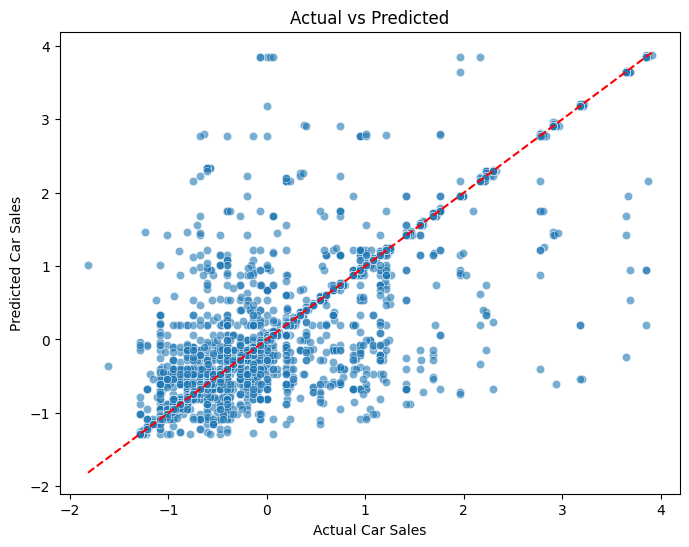

In [ ]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_tree_test)


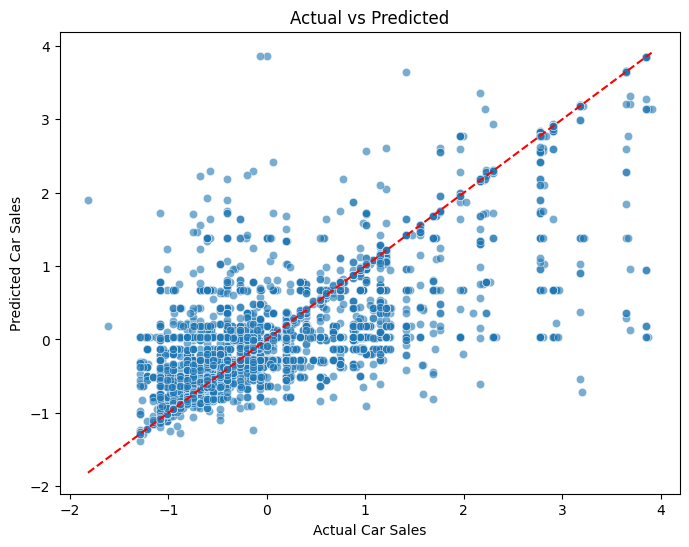

In [ ]:
plot_actual_vs_predicted(y_test=y_test, y_pred=final_pred_test)

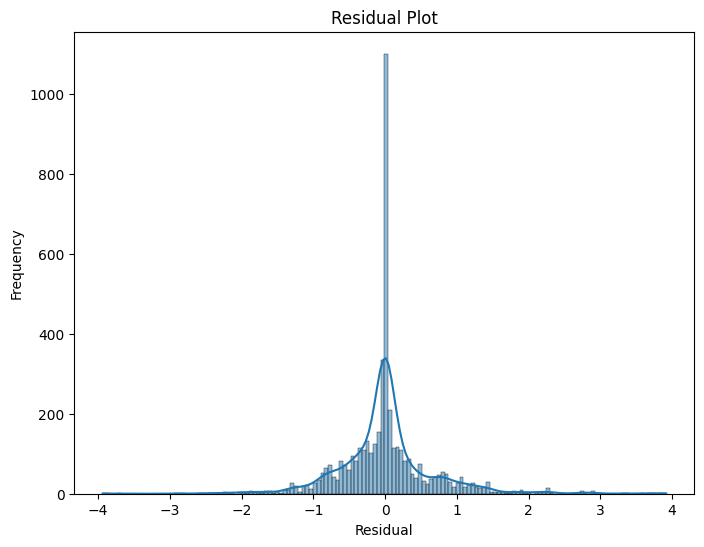

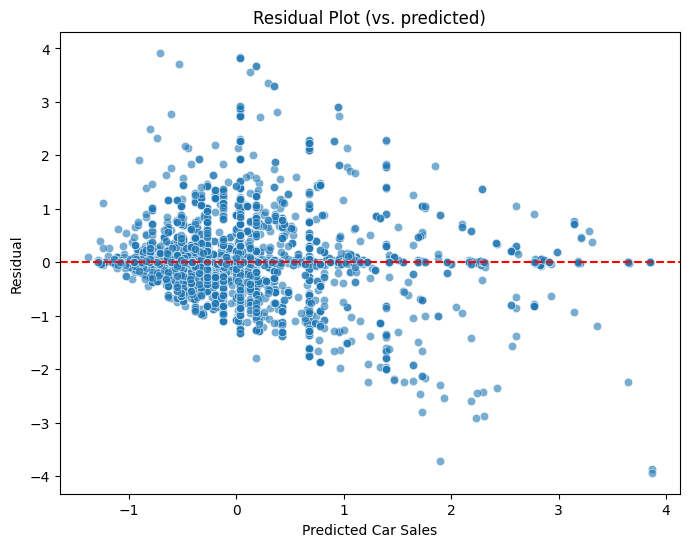

In [ ]:
plot_residuals(y_test=y_test, y_pred=final_pred_test)


### **Random Forest**

In [ ]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.976796785497195
Mean Absolute Error: 0.08558026722616775
Mean Squared Error: 0.023124782207311994
Root Mean Squared Error: 0.15206834715782241
Accuracy-like Measure (within 10%): 57.90%
Test Results:
R-squared: 0.8305169087568605
Mean Absolute Error: 0.22863841569780083
Mean Squared Error: 0.17173704811540885
Root Mean Squared Error: 0.4144116891635766
Accuracy-like Measure (within 10%): 38.74%


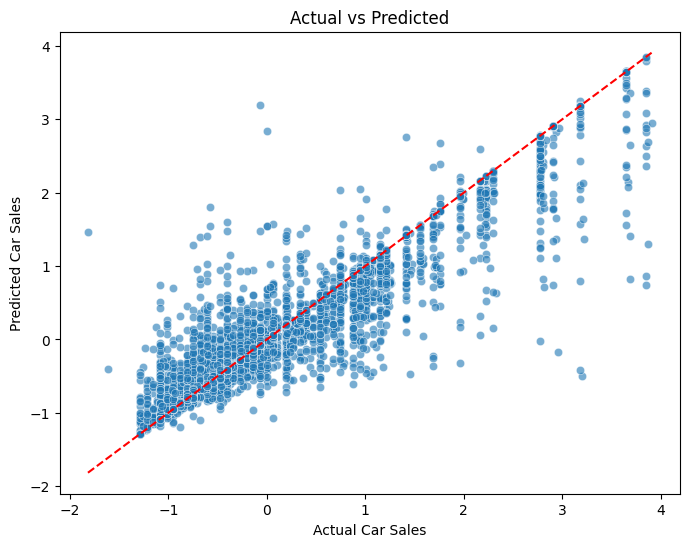

In [ ]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_rf_test)


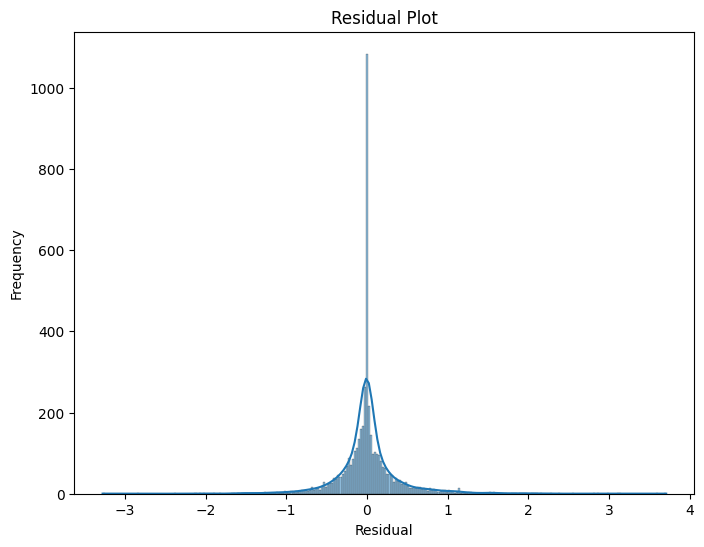

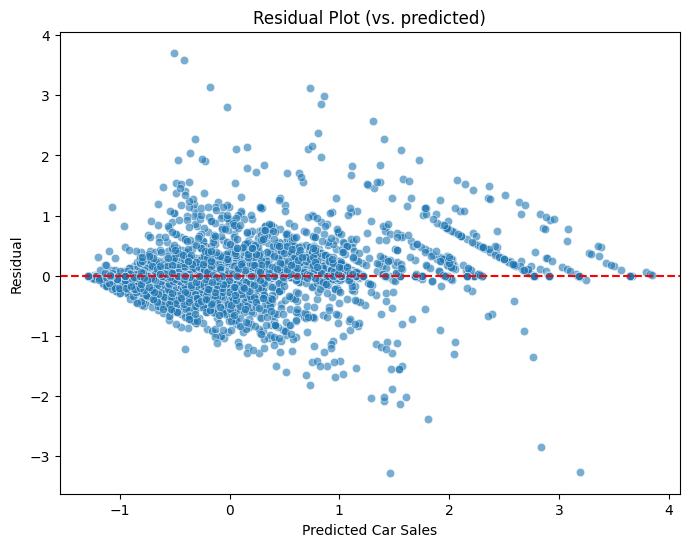

In [ ]:
plot_residuals(y_test=y_test, y_pred=y_pred_rf_test)

### ****XGBoost****

In [ ]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.5549690819133164
Mean Absolute Error: 0.45044399535536916
Mean Squared Error: 0.4435266094286434
Root Mean Squared Error: 0.6659779346409634
Accuracy-like Measure (within 10%): 19.68%
Test Results:
R-squared: 0.4932589594583128
Mean Absolute Error: 0.47549895428243566
Mean Squared Error: 0.5134801933528149
Root Mean Squared Error: 0.7165753228745845
Accuracy-like Measure (within 10%): 19.86%


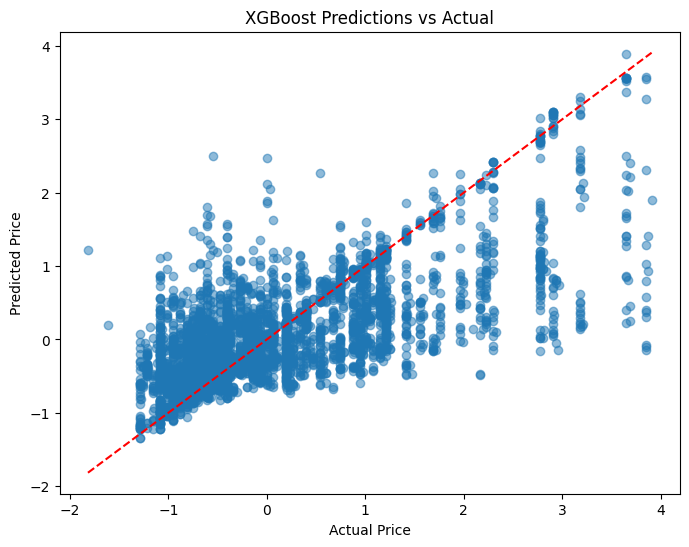

In [ ]:

# XGBoost predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xb_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features for training each tree
}

random_search = RandomizedSearchCV(XGBoost_Regressor, param_distributions=param_grid_xb, n_iter=30, 
                                   cv=5, n_jobs=-1, verbose=3)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=120,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [ ]:
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.7422355479341843
Mean Absolute Error: 0.34379140463624486
Mean Squared Error: 0.25689314789071543
Root Mean Squared Error: 0.506846276390303
Accuracy-like Measure (within 10%): 23.71%
Test Results:
R-squared: 0.5637600432984187
Mean Absolute Error: 0.4320452441264608
Mean Squared Error: 0.4420415150821481
Root Mean Squared Error: 0.6648620271019756
Accuracy-like Measure (within 10%): 22.04%


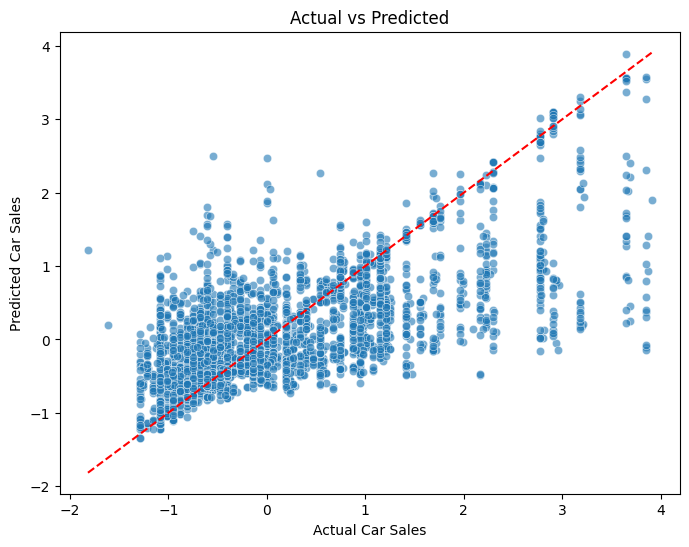

In [ ]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_xb_test)


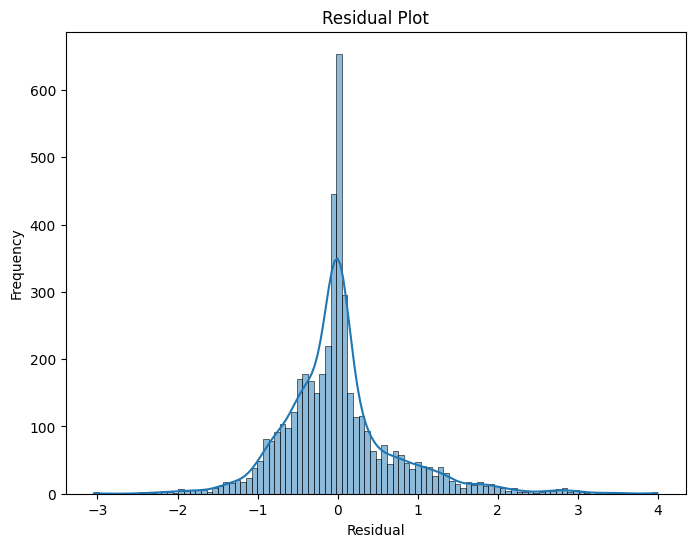

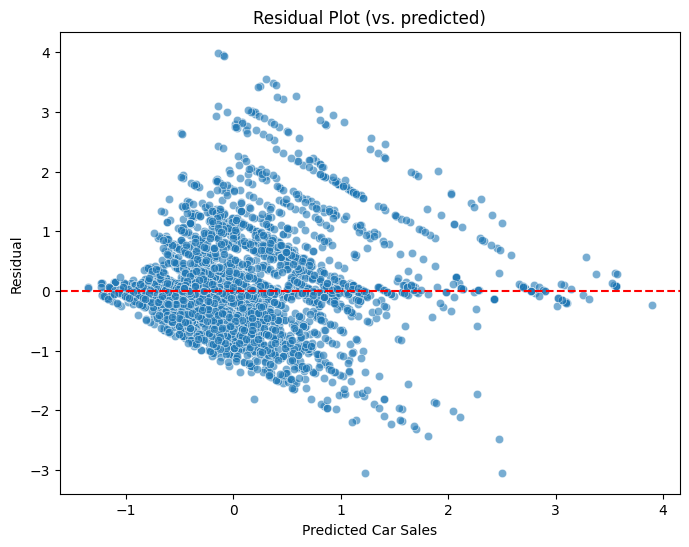

In [ ]:
plot_residuals(y_test=y_test, y_pred=y_pred_xb_test)


### **Gradient Boosting**

In [ ]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.6080038751058795
Mean Absolute Error: 0.4326391757388992
Mean Squared Error: 0.39067108624931873
Root Mean Squared Error: 0.6250368679120606
Accuracy-like Measure (within 10%): 19.65%
Test Results:
R-squared: 0.5519362864534899
Mean Absolute Error: 0.45616872135035885
Mean Squared Error: 0.4540225161559918
Root Mean Squared Error: 0.6738119293660448
Accuracy-like Measure (within 10%): 19.27%


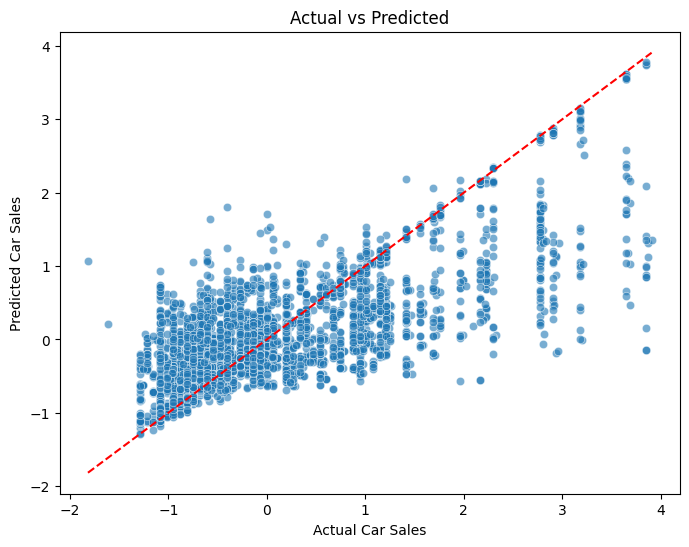

In [ ]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_gb_test)   


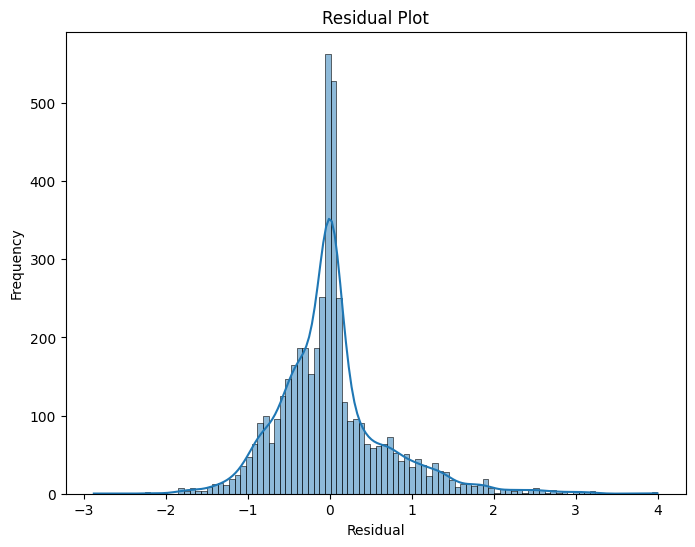

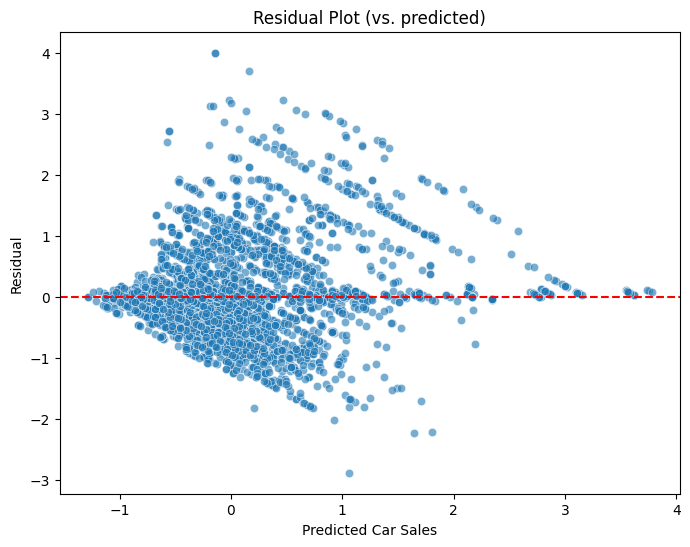

In [ ]:
plot_residuals(y_test=y_test, y_pred=y_pred_gb_test)

## **Comparison and Best Model**
- Compare the models' performance and choose the best-performing model based on evaluation metrics.


In [ ]:
results = {
    'Model': ['Gradient Boost', 'Decision Tree', 'XGBoost', 'Random Forest' ],
    
    'R² Train': [
        r2_score(y_train, y_pred_gb_train),
        r2_score(y_train, final_pred_train),
        r2_score(y_train, y_pred_xb_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    
    'R² Test': [
        r2_score(y_test, y_pred_gb_test),
        r2_score(y_test, final_pred_test),
        r2_score(y_test, y_pred_xb_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    
    'MAE Train': [
        mean_absolute_error(y_train, y_pred_gb_train),
        mean_absolute_error(y_train, final_pred_train),
        mean_absolute_error(y_train, y_pred_xb_train),
        mean_absolute_error(y_train, y_pred_rf_train)
    ],
    
    'MAE Test': [
        mean_absolute_error(y_test, y_pred_gb_test),
        mean_absolute_error(y_test, final_pred_test),
        mean_absolute_error(y_test, y_pred_xb_test),
        mean_absolute_error(y_test, y_pred_rf_test)
    ],
    
    'RMSE Train': [
        np.sqrt(mean_squared_error(y_train, y_pred_gb_train)),
        np.sqrt(mean_squared_error(y_train, final_pred_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_xb_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    ],
    
    'RMSE Test': [
        np.sqrt(mean_squared_error(y_test, y_pred_gb_test)),
        np.sqrt(mean_squared_error(y_test, final_pred_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_xb_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    ],
    'Time Train': [
        end_time_gb - start_time_gb,
        end_time_dt - start_time_dt,
        end_time_xb - start_time_xb,
        end_time_rf - start_time_rf
    ],
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)


                R² Train   R² Test  MAE Train  MAE Test  RMSE Train  \
Model                                                                 
Gradient Boost  0.608004  0.551936   0.432639  0.456169    0.625037   
Decision Tree   0.656651  0.572425   0.355044  0.404599    0.584969   
XGBoost         0.554969  0.493259   0.450444  0.475499    0.665978   
Random Forest   0.976797  0.830517   0.085580  0.228638    0.152068   

                RMSE Test  Time Train  
Model                                  
Gradient Boost   0.673812   25.122828  
Decision Tree    0.658226    0.612521  
XGBoost          0.716575    1.098773  
Random Forest    0.414412   60.181058  


In [ ]:
results_df.sort_values(by='R² Train', ascending=True, inplace=False)


R² Train   R² Test  MAE Train  MAE Test  RMSE Train  \
Model                                                                 
XGBoost         0.554969  0.493259   0.450444  0.475499    0.665978   
Gradient Boost  0.608004  0.551936   0.432639  0.456169    0.625037   
Decision Tree   0.656651  0.572425   0.355044  0.404599    0.584969   
Random Forest   0.976797  0.830517   0.085580  0.228638    0.152068   

                RMSE Test  Time Train  
Model                                  
XGBoost          0.716575    1.098773  
Gradient Boost   0.673812   25.122828  
Decision Tree    0.658226    0.612521  
Random Forest    0.414412   60.181058

In [ ]:

reg_models = {
    'Decision Tree': Decision_Tree_Regressor,
    'Random Forest': Random_Forest_Regressor,
    'XGBoost': XGBoost_Regressor,
    'Gradient Boosting': Gradient_Boosting_Regressor
}
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error)
}


regression_results = {}

for name, model in reg_models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    regression_results[name] = {
        'R2 Mean': scores['test_r2'].mean(),
        'MSE Mean': scores['test_mse'].mean(),
        'MAE Mean': scores['test_mae'].mean(),
        'MAPE Mean': scores['test_mape'].mean()
    }


for model, metrics in regression_results.items():
    print(f"\n Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
cros_results = pd.DataFrame(regression_results)



 Model: Decision Tree
R2 Mean: 0.9920
MSE Mean: 0.0079
MAE Mean: 0.0246
MAPE Mean: 0.1502

 Model: Random Forest
R2 Mean: 0.9976
MSE Mean: 0.0024
MAE Mean: 0.0133
MAPE Mean: 0.0521

 Model: XGBoost
R2 Mean: 0.9955
MSE Mean: 0.0045
MAE Mean: 0.0342
MAPE Mean: 0.2000

 Model: Gradient Boosting
R2 Mean: 0.9973
MSE Mean: 0.0027
MAE Mean: 0.0300
MAPE Mean: 0.1891


In [ ]:
print(cros_results)

           Decision Tree  Random Forest   XGBoost  Gradient Boosting
R2 Mean         0.992036       0.997637  0.995515           0.997265
MSE Mean        0.007938       0.002359  0.004459           0.002730
MAE Mean        0.024550       0.013311  0.034188           0.030035
MAPE Mean       0.150178       0.052124  0.200048           0.189131


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

print(y_pred_gb_test.shape)
print(y_pred_tree_test.shape)
print(y_pred_xb_test.shape)
print(y_pred_rf_test.shape)

print(y_pred_gb_train.shape)
print(y_pred_tree_train.shape)  
print(y_pred_xb_train.shape)
print(y_pred_rf_train.shape)

print(cros_results.shape)


(4618, 5)
(4618,)
(18471, 5)
(18471,)
(4618,)
(4618,)
(4618,)
(4618,)
(18471,)
(18471,)
(18471,)
(18471,)
(4, 4)


In [ ]:
def plot_learning_curve(model, X, y, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_dashboard(y_test, y_pred, model_name='Model'):

    residuals = y_test - y_pred

    # ---- Dashboard ----
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))

    # Plot: Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs, alpha=0.5)
    axs.axhline(0, color='red', linestyle='--')
    axs.set_title(f'Residual Plot: {model_name}')
    axs.set_xlabel('Predicted Values')
    axs.set_ylabel('Residuals')
    axs.grid(True)

    plt.tight_layout()
    plt.show()


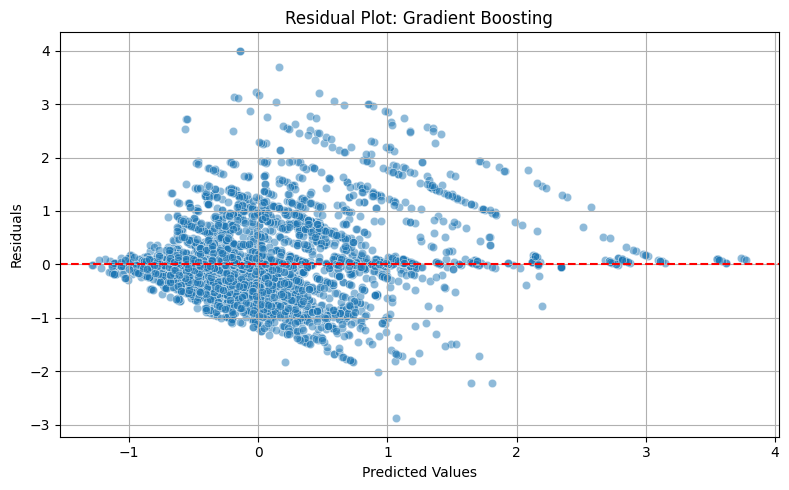

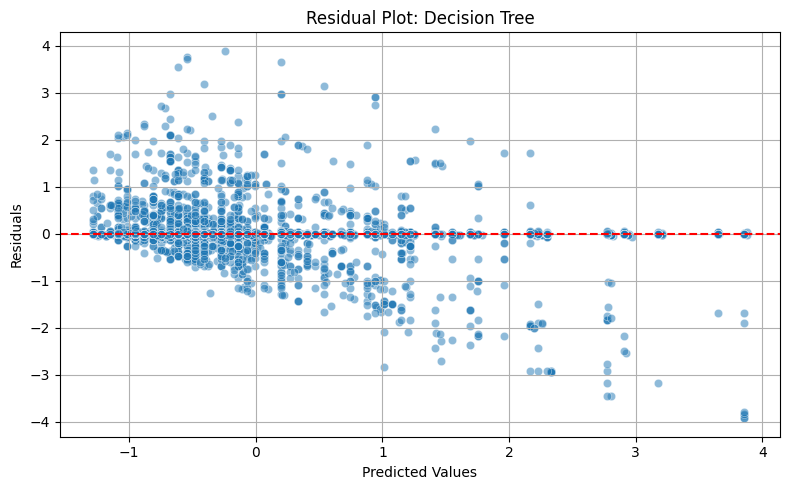

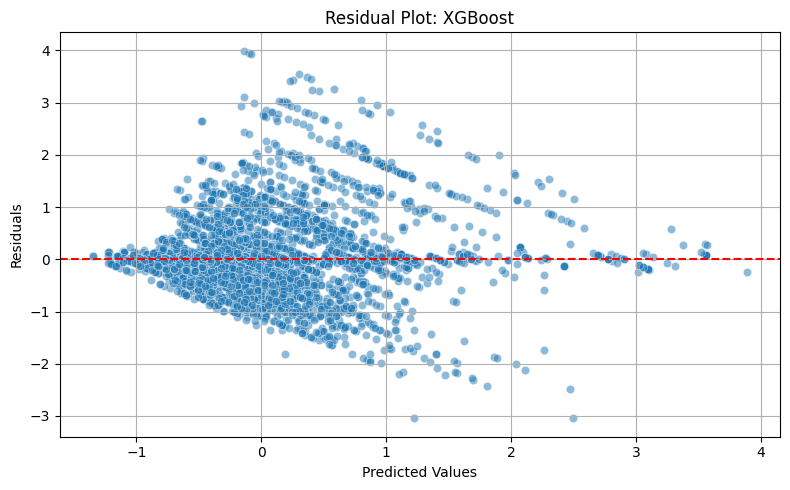

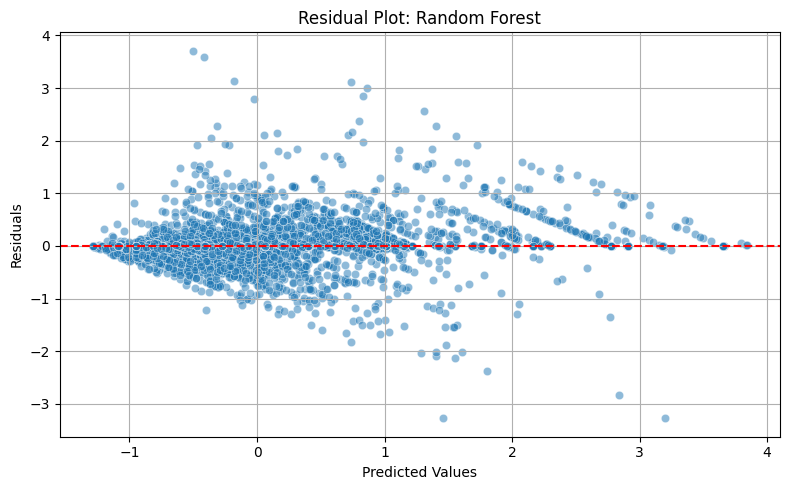

In [ ]:
plot_dashboard(y_test, y_pred_gb_test, model_name='Gradient Boosting')
plot_dashboard(y_test, y_pred_tree_test, model_name='Decision Tree')
plot_dashboard(y_test, y_pred_xb_test, model_name='XGBoost')
plot_dashboard(y_test, y_pred_rf_test, model_name='Random Forest')



# **ML Forcasting Models** <a class="anchor" id="Ml_Forecasting_Models"></a>


### **show Sales**

In [7]:
cars_sales_Model.columns

Index(['Date', 'Annual Income', 'Company', 'Engine', 'Price ($)', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [8]:
df = cars_sales_Model[['Date','Company']]
df = df.set_index('Date')
k = np.ones(shape=len(df))
df.insert(0,'Sales',k)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23089 entries, 2022-01-02 to 2023-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sales    23089 non-null  float64
 1   Company  23089 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 541.1 KB


<Axes: xlabel='Date'>

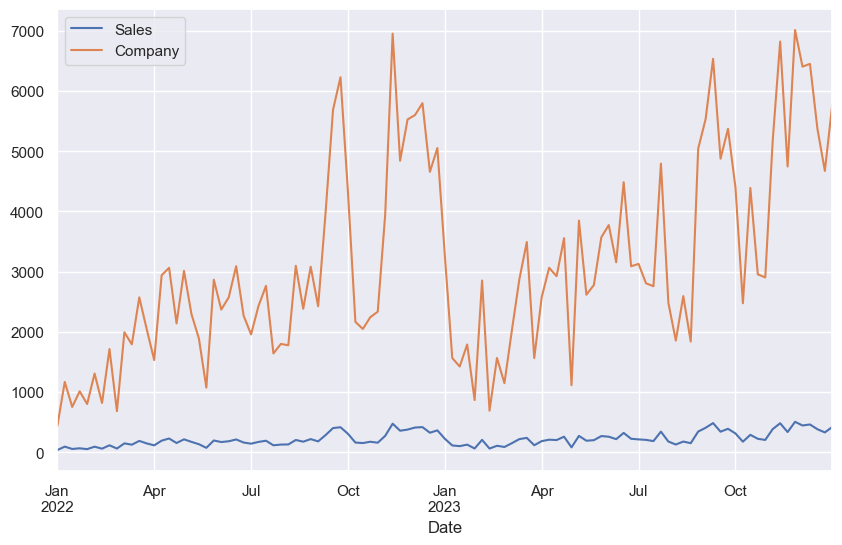

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
df.resample('W').sum().plot(kind='line',ax=ax)
# What we see below is weekly ( daily sales are added to arrive on weekly number ) sales figure plotted against time .

<Axes: xlabel='Date'>

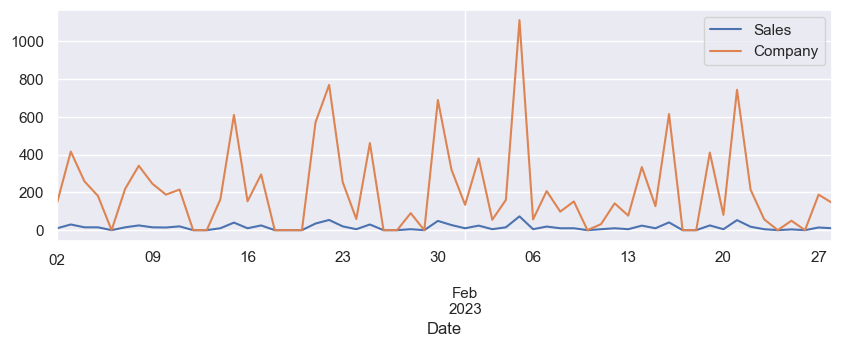

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
df['2023-01':'2023-02'].resample('D').sum().plot(kind='line', ax= ax)


<Axes: xlabel='Date'>

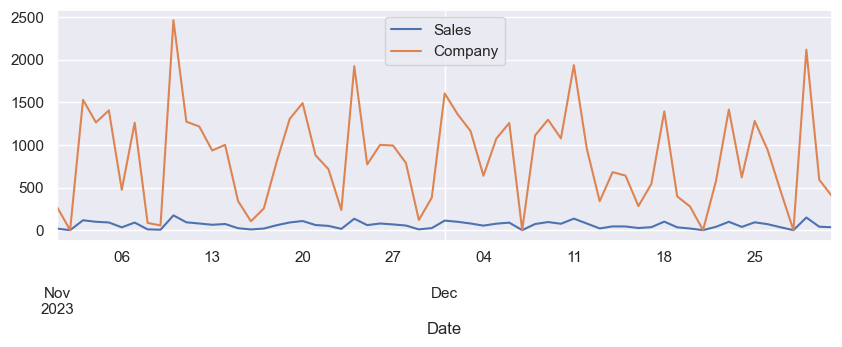

In [12]:
fig, ax = plt.subplots(figsize=(10,3))
df['2023-11':'2023-12'].resample('D').sum().plot(kind='line', ax= ax)

In [ ]:

df1 =df.resample('D').sum()
print(len(df1))
df1.head()

729


Sales  Company
Date                      
2022-01-02   34.0      432
2022-01-03   19.0      218
2022-01-04   15.0      254
2022-01-05   29.0      339
2022-01-06   10.0      142

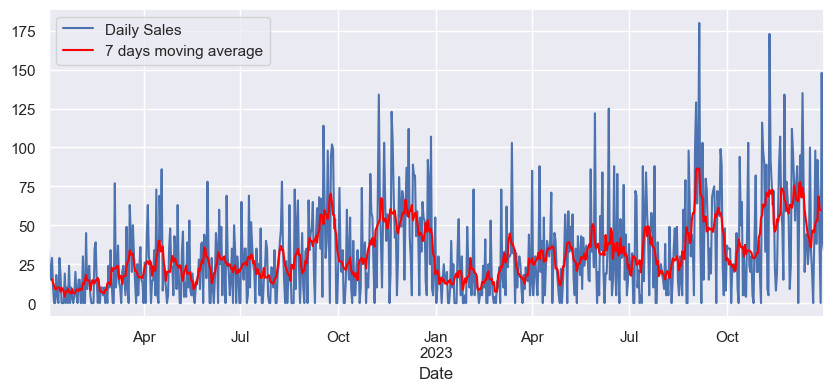

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
df1['Sales'].plot(kind='line', ax=ax)
# what about 7 days moving average 
df1['Sales'].rolling(7, center=True).mean().plot(kind='line', color='red', ax=ax)
# We can clearly see that it is non-stationary time series . Let us perform few tests here to validate our visual 
plt.legend(['Daily Sales', '7 days moving average'])
plt.show()
# Just before and after Oct there is increase in sales. Kind of seasonal behavior . We would  split the time series 

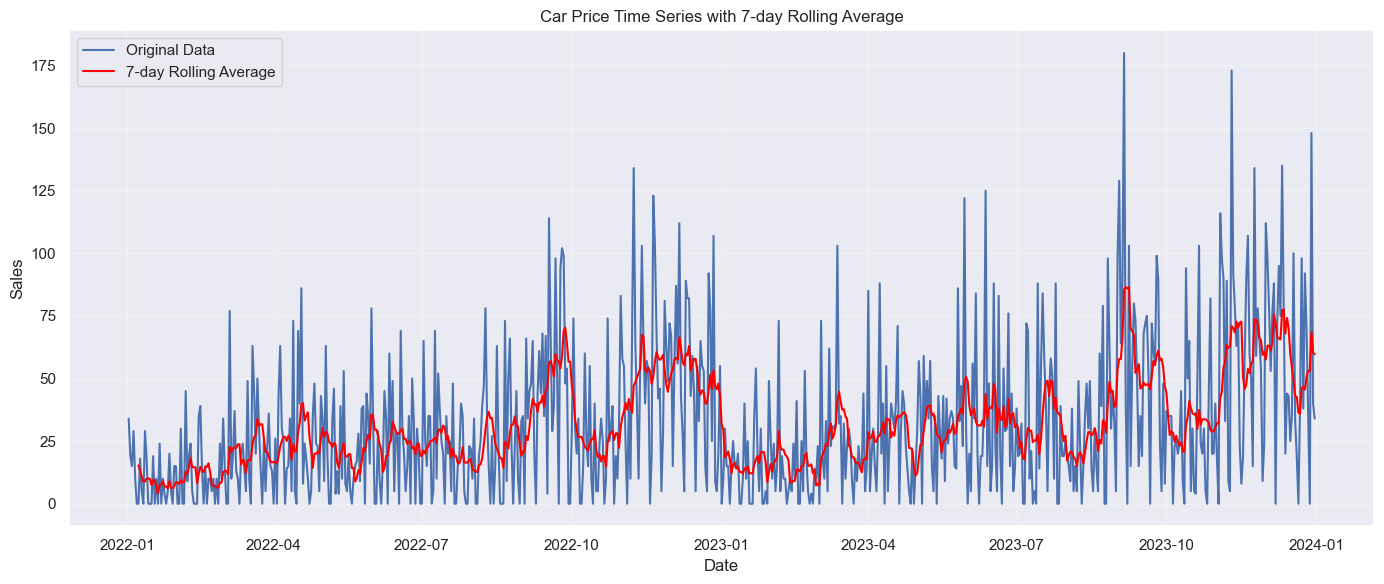

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df1['Sales'], label='Original Data')
plt.plot(df1['Sales'].rolling(window=7).mean(), label='7-day Rolling Average', color='red')
plt.title('Car Price Time Series with 7-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./Images/moving_average.png')
plt.show()

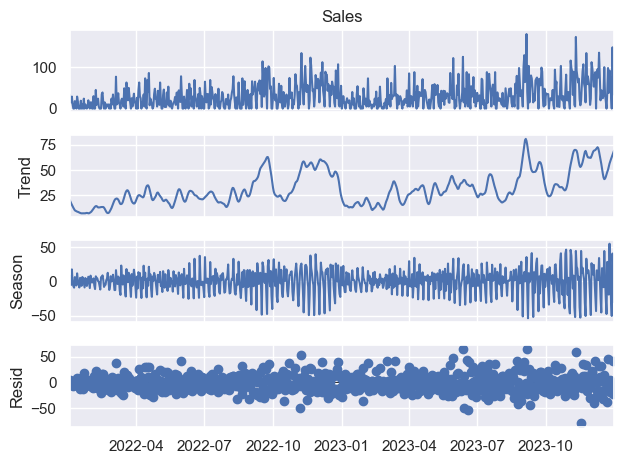

In [16]:


stl = STL(df1['Sales']) # I could have dropped the other column
res = stl.fit()
fig = res.plot()

In [17]:
df1.drop(columns='Company', inplace =True)
df1.head()

Sales
Date             
2022-01-02   34.0
2022-01-03   19.0
2022-01-04   15.0
2022-01-05   29.0
2022-01-06   10.0

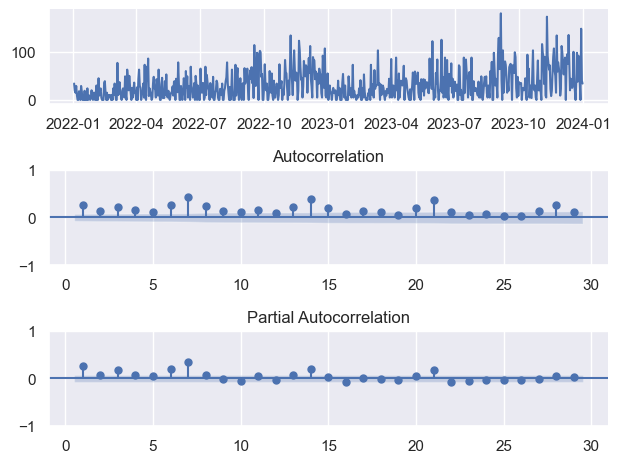

In [18]:

def my_plots(data, lags=None):
    layout = (3, 1)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (1, 0))
    pacf = plt.subplot2grid(layout, (2, 0))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()
my_plots(df1)

### **prophet**  <a class="anchor" id="prophet"></a>

In [86]:
cars_sales_Model.columns

Index(['Date', 'Annual Income', 'Company', 'Engine', 'Price ($)', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

#### Help funcation

In [87]:
def remove_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]
def dampen_forecast(forecast, df_original, damping_factor=0.9, days_to_start_damping=7):
    """Apply dampening to the forecast trend to prevent unrealistic projections"""
    damped_forecast = forecast.copy()
    
    # Get the last observed date and trend value
    last_observed_date = df_original['ds'].max()
    last_trend = forecast[forecast['ds'] <= last_observed_date]['trend'].iloc[-1]
    
    # Find future indices
    future_indices = forecast['ds'] > last_observed_date
    
    # Apply dampening to future predictions
    for i, row in forecast[future_indices].iterrows():
        days_from_end = (row['ds'] - last_observed_date).days
        if days_from_end > days_to_start_damping:
            # Calculate damping factor based on distance from last observation
            damping = damping_factor ** (days_from_end - days_to_start_damping)
            
            # Apply dampening to trend component
            diff_from_last = row['trend'] - last_trend
            damped_trend = last_trend + diff_from_last * damping
            
            # Update forecast values
            trend_diff = damped_trend - row['trend']
            damped_forecast.loc[i, 'trend'] = damped_trend
            damped_forecast.loc[i, 'yhat'] = row['yhat'] + trend_diff
            damped_forecast.loc[i, 'yhat_lower'] = row['yhat_lower'] + trend_diff
            damped_forecast.loc[i, 'yhat_upper'] = row['yhat_upper'] + trend_diff
    
    return damped_forecast
def add_external_regressors(model, df, future):
    # Create example market index (replace with your actual data)
    # This simulates a market that's growing slightly over time
    dates = pd.date_range(start=df['ds'].min(), end=future['ds'].max())
    market_data = pd.DataFrame({
        'ds': dates,
        'market_index': np.linspace(100, 110, len(dates)) + np.random.normal(0, 1, len(dates))
    })
    
    # Add to historical data
    df = df.merge(market_data, on='ds', how='left')
    
    # Add to future dataframe
    future = future.merge(market_data, on='ds', how='left')
    
    # Add regressor to model
    model.add_regressor('market_index')
    
    return model, df, future

####

In [88]:
df_prophet = cars_sales_Model[['Date', 'Price ($)']].copy()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Price ($)': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [89]:
df_prophet_clean = remove_outliers(df_prophet, 'y')
print(f"Removed {len(df_prophet) - len(df_prophet_clean)} outliers")

Removed 337 outliers


In [90]:
model_prophet = Prophet(
    changepoint_prior_scale=0.01,  
    seasonality_prior_scale=10.0, 
    seasonality_mode='multiplicative',  
    changepoint_range=0.95,
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

custom_changepoints = pd.to_datetime(['2023-08-01'])
model_prophet.changepoints = custom_changepoints

model_prophet.fit(df_prophet_clean)


06:29:38 - cmdstanpy - INFO - Chain [1] start processing
06:29:42 - cmdstanpy - INFO - Chain [1] done processing


In [91]:
future = model_prophet.make_future_dataframe(periods=30, freq='D')
forecast_p = model_prophet.predict(future)

damped_forecast = dampen_forecast(forecast_p, df_prophet_clean)


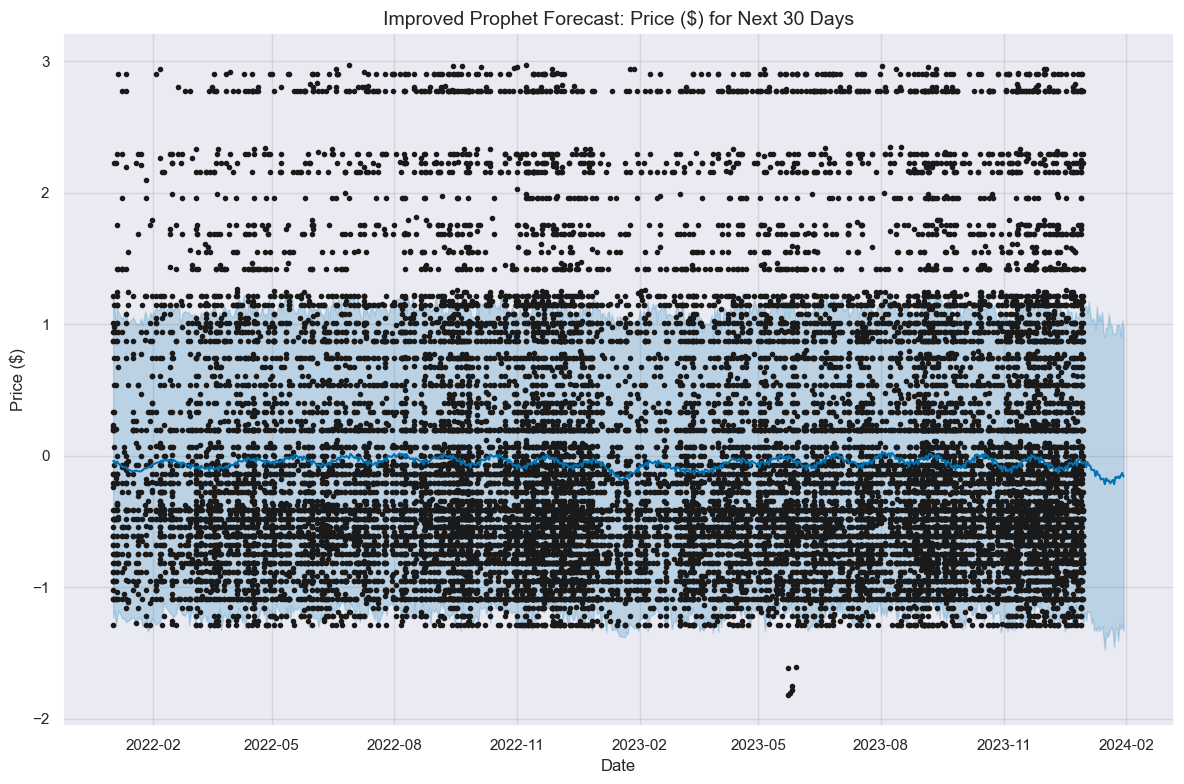

In [93]:
# Plot the improved forecast
fig, ax = plt.subplots(figsize=(12, 8))
model_prophet.plot(damped_forecast, ax=ax)
ax.set_title('Improved Prophet Forecast: Price ($) for Next 30 Days', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


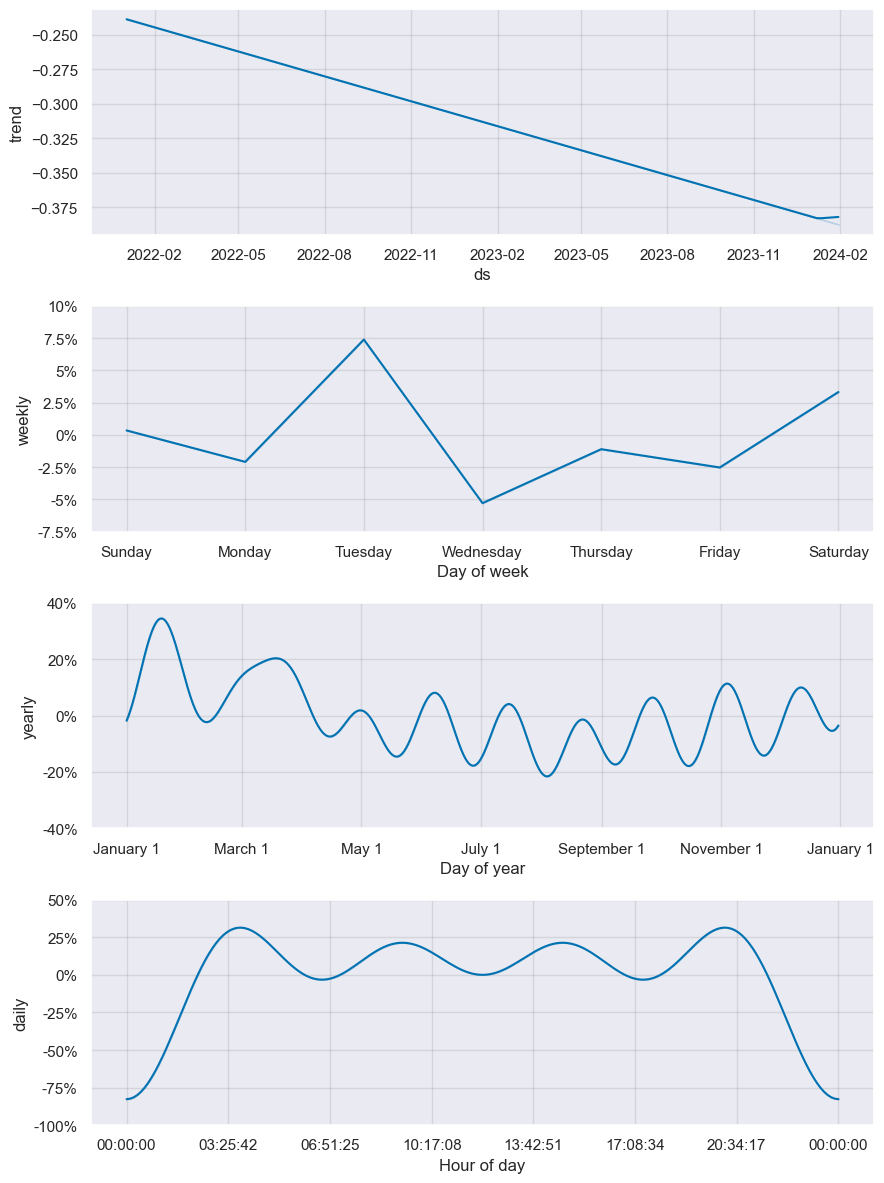

In [94]:

# Plot the components to verify improvements
fig = model_prophet.plot_components(damped_forecast)
plt.tight_layout()
plt.show()

06:30:28 - cmdstanpy - INFO - Chain [1] start processing
06:30:41 - cmdstanpy - INFO - Chain [1] done processing


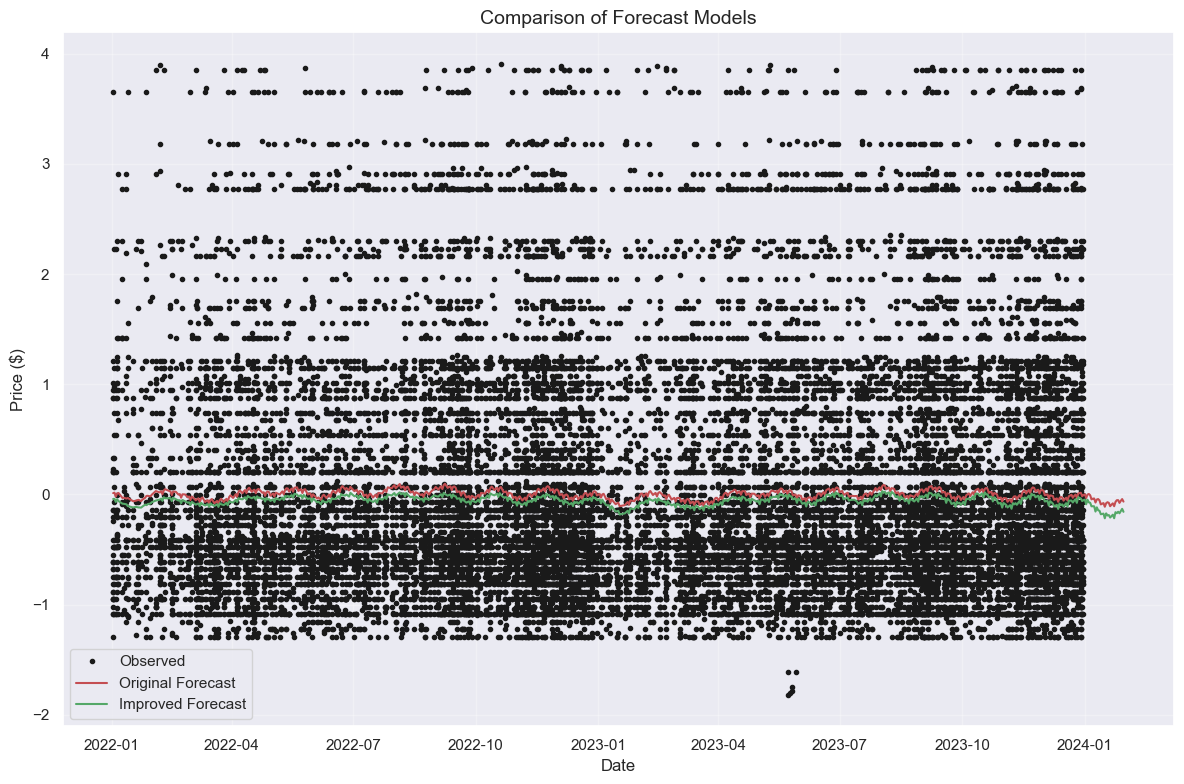

In [95]:
# Compare original vs improved forecast
original_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
original_model.fit(df_prophet)
original_forecast = original_model.predict(future)

plt.figure(figsize=(12, 8))
plt.plot(df_prophet['ds'], df_prophet['y'], 'k.', label='Observed')
plt.plot(original_forecast['ds'], original_forecast['yhat'], 'r-', label='Original Forecast')
plt.plot(damped_forecast['ds'], damped_forecast['yhat'], 'g-', label='Improved Forecast')
plt.title('Comparison of Forecast Models', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./Images/forecast_comparison.png', dpi=300)
plt.show()

In [97]:




# Show the forecasted values for the next 30 days
forecast_comparison = pd.DataFrame({
    'Date': forecast_p['ds'].tail(30),
    'Original Forecast': original_forecast['yhat'].tail(30),
    'Improved Forecast': damped_forecast['yhat'].tail(30)
})
print("\nForecast Comparison for Next 30 Days:")
print(forecast_comparison[['Date', 'Original Forecast', 'Improved Forecast']])



Forecast Comparison for Next 30 Days:
          Date  Original Forecast  Improved Forecast
612 2024-01-01           0.001336          -0.047156
613 2024-01-02          -0.031512          -0.089161
614 2024-01-03          -0.001334          -0.047675
615 2024-01-04           0.004192          -0.071762
616 2024-01-05          -0.007040          -0.075391
617 2024-01-06          -0.044350          -0.107633
618 2024-01-07          -0.038688          -0.106662
619 2024-01-08          -0.036731          -0.107984
620 2024-01-09          -0.073228          -0.155144
621 2024-01-10          -0.045756          -0.117199
622 2024-01-11          -0.041914          -0.143640
623 2024-01-12          -0.053754          -0.148051
624 2024-01-13          -0.090574          -0.179644
625 2024-01-14          -0.083330          -0.176368
626 2024-01-15          -0.078736          -0.174058
627 2024-01-16          -0.111603          -0.216352
628 2024-01-17          -0.079599          -0.171947
629 202

In [99]:
# Cross-validate to measure forecast accuracy
df_cv = cross_validation(
    model=model_prophet,
    initial='180 days',  # Use 6 months for initial training
    period='30 days',    # Forecast every month
    horizon='30 days',   # Forecast 30 days ahead
    parallel='processes'
)

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Model Performance Metrics:")
print(df_p[['horizon', 'mae', 'mape', 'rmse']].tail())


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


Model Performance Metrics:
   horizon       mae      mape      rmse
23 26 days  0.710739  1.071852  0.921096
24 27 days  0.709502  1.105678  0.922556
25 28 days  0.702538  1.175596  0.912121
26 29 days  0.698447  1.242223  0.900505
27 30 days  0.698387  1.273542  0.889385


### **Arima**  <a class="anchor" id="Arima"></a>

In [19]:
train = df1["2022-01":"2023-11"] 
valid = df1["2023-12":] 

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


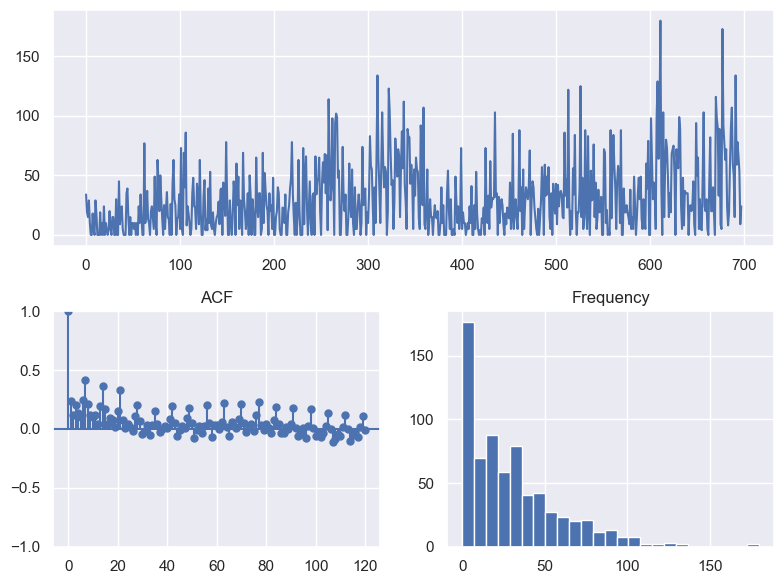

In [20]:
tsdisplay(train, lag_max=120)

In [21]:
arima_model = pm.auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


print(arima_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7011.914, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6791.364, Time=1.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7010.210, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7010.045, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6714.123, Time=6.31 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6733.067, Time=6.34 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6715.815, Time=4.86 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=7.21 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6714.968, Time=2.83 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=8.51 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=6713.4

In [22]:
print('Normal_order: :', arima_model.order)
print('Seasonal_order: :', arima_model.seasonal_order)

Normal_order: : (1, 0, 0)
Seasonal_order: : (2, 1, 0, 12)


Figure(2000x1000)


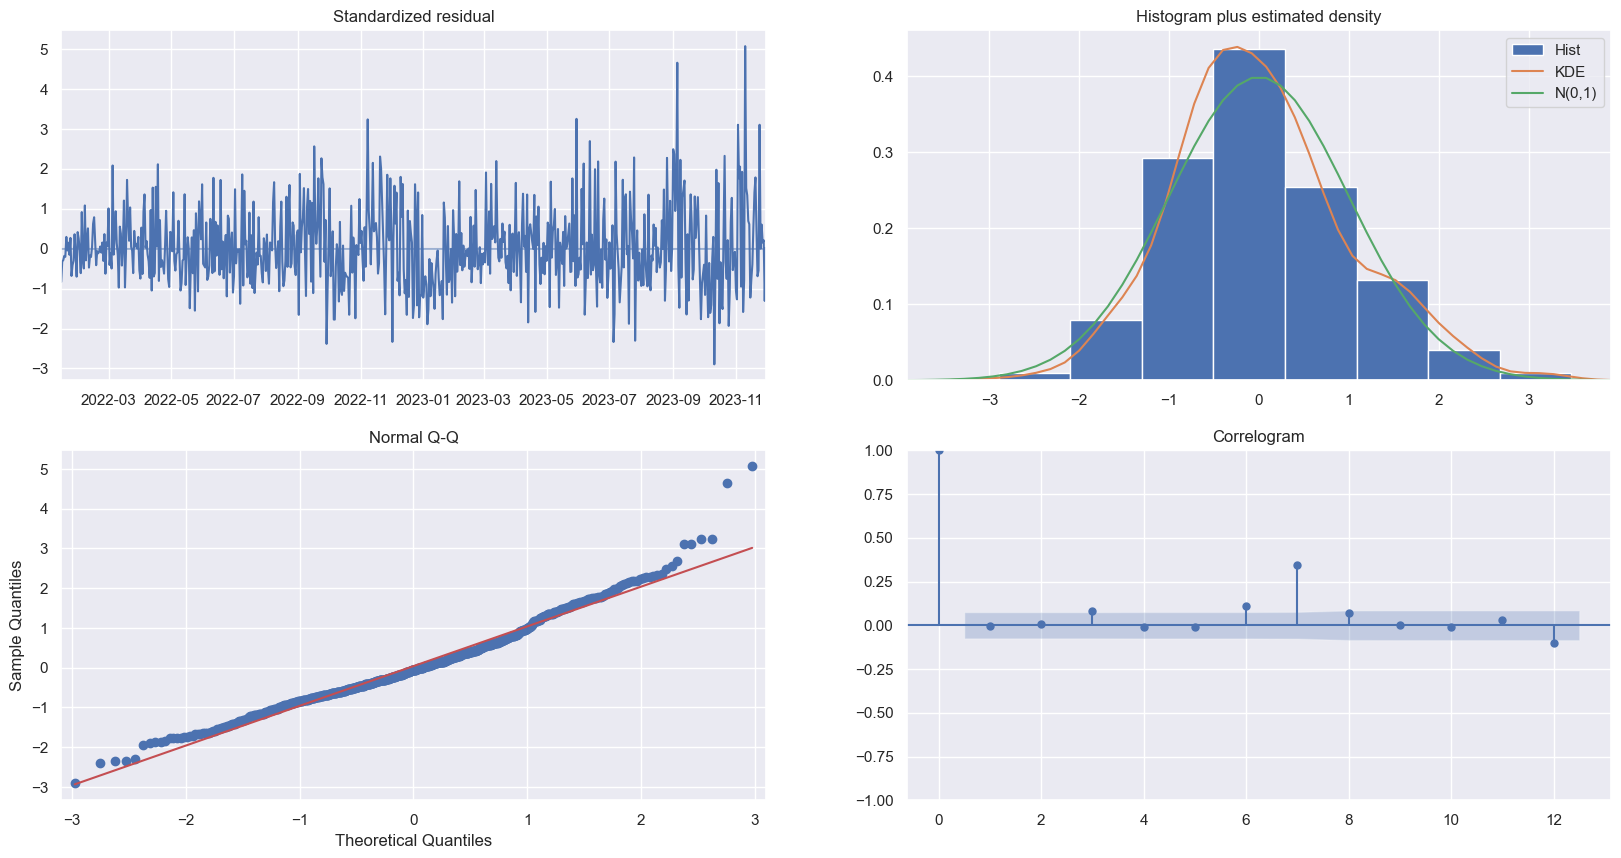

In [23]:
print(arima_model.plot_diagnostics(lags=12,figsize = (20,10),))

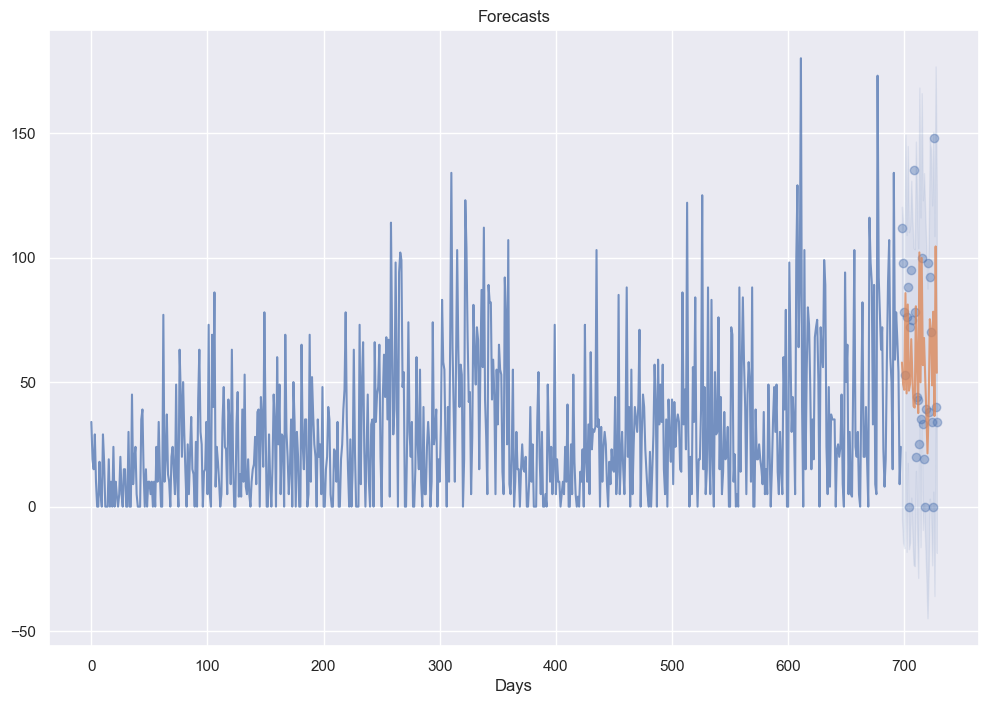

In [24]:
pred_arima, conf_int = arima_model.predict(n_periods=valid.shape[0], return_conf_int=True)
x_axis = np.arange(train.shape[0] + pred_arima.shape[0])
x_days = x_axis  
plt.figure(figsize=(12,8))
plt.plot(x_days[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_days[x_axis[train.shape[0]:]], pred_arima, alpha=0.75)  
plt.scatter(x_days[x_axis[train.shape[0]:]], valid,
            alpha=0.4, marker='o')  # Test data
plt.fill_between(x_days[x_axis[-pred_arima.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Forecasts")
plt.xlabel("Days")
plt.savefig('./Images/arima_pridict.png')

<Axes: xlabel='Date'>

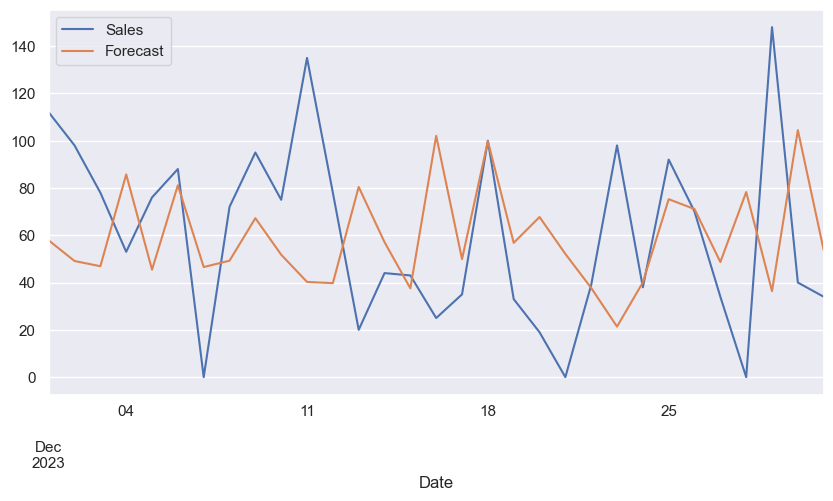

In [25]:
valid.insert(1, 'Forecast',pred_arima)
fig , ax = plt.subplots( figsize=(10,5))
valid.plot(ax=ax)

In [ ]:
# Extract the true and predicted values
y_true_a = valid['Sales'].values
y_pred_a = valid['Forecast'].values

# Calculate metrics
mae = mean_absolute_error(y_true_a, y_pred_a)
rmse = np.sqrt(mean_squared_error(y_true_a, y_pred_a))
mape = np.mean(np.abs((y_true_a - y_pred_a) / y_true_a)) * 100
r2 = r2_score(y_true_a, y_pred_a)

# Display results in a formatted table
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R²'],
    'Value': [mae, rmse, mape, r2]
})
print(metrics_df)


     Metric      Value
0       MAE  36.769707
1      RMSE  46.817106
2  MAPE (%)        inf
3        R²  -0.513522


C:\Users\DELL\AppData\Local\Temp\ipykernel_22376\2453348763.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_a - y_pred_a) / y_true_a)) * 100


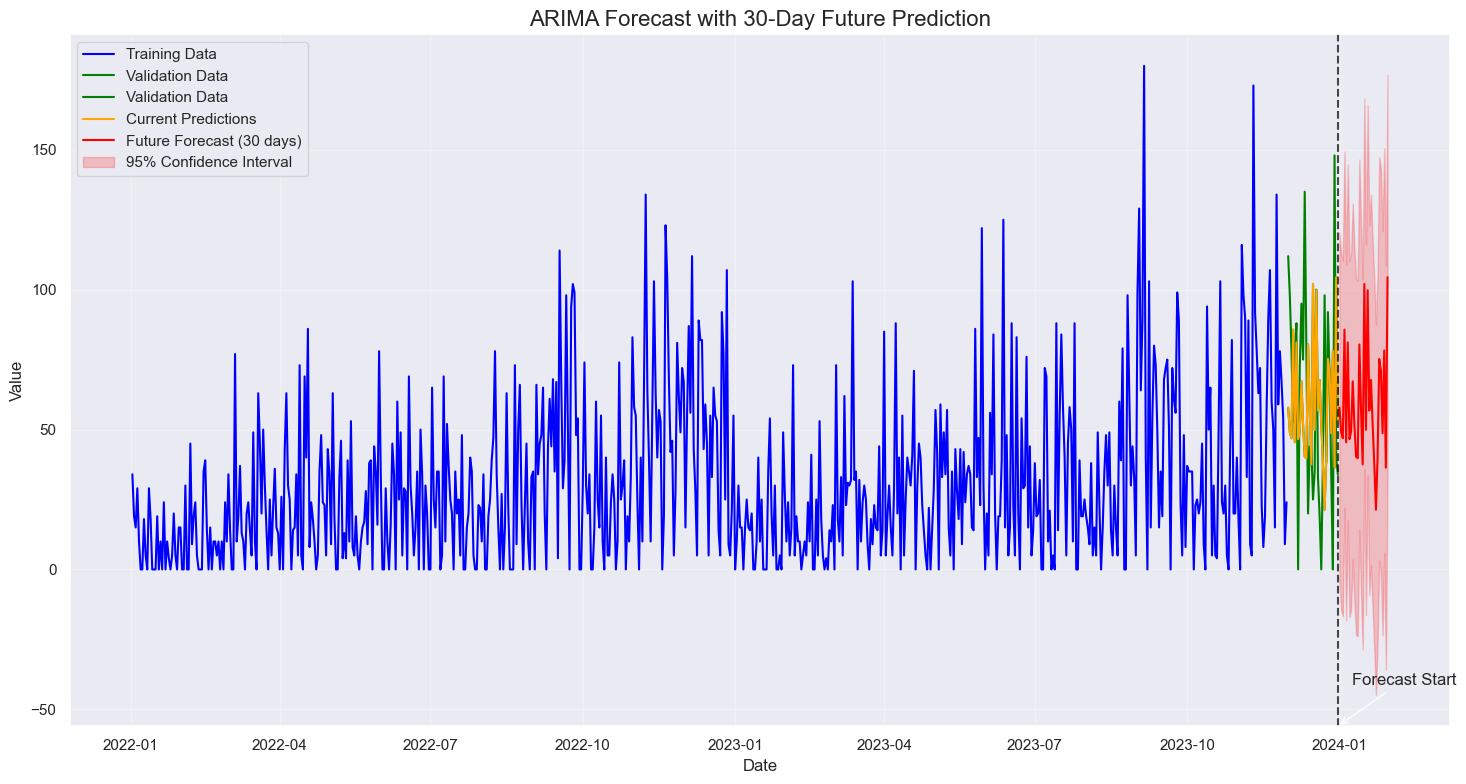

In [27]:
last_date = df1.index[-1]
future_forecast, future_conf = arima_model.predict(n_periods=30, return_conf_int=True)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

plt.figure(figsize=(15, 8))
plt.plot(train.index, train, color='blue', label='Training Data')
plt.plot(valid.index, valid, color='green', label='Validation Data')
plt.plot(valid.index, pred_arima, color='orange', label='Current Predictions')
plt.plot(future_dates, future_forecast, color='red', label='Future Forecast (30 days)')
plt.fill_between(future_dates, 
                 future_conf[:, 0], 
                 future_conf[:, 1], 
                 color='red', 
                 alpha=0.2, 
                 label='95% Confidence Interval')

# Formatting
plt.title('ARIMA Forecast with 30-Day Future Prediction', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Add vertical line to indicate forecast start
plt.axvline(x=last_date, color='black', linestyle='--', alpha=0.7)
plt.annotate('Forecast Start', 
             xy=(last_date, plt.gca().get_ylim()[0]),
             xytext=(10, 30), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()


### Tune the Arima

In [28]:
train_tune = df1["2022-01":"2023-11"] 
valid_tune = df1["2023-12":] 

In [29]:
arima_model_tuned = pm.auto_arima(
    train_tune,
    start_p=0, start_q=0, max_p=5, max_q=5, m=12,
    start_P=0, seasonal=True,
    d=None, D=1, trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7011.914, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6791.364, Time=2.95 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7010.210, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7010.045, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6714.123, Time=5.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.29 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6733.067, Time=7.51 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6715.815, Time=5.41 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=9.86 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6714.968, Time=5.22 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=16.31 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=6713.

Figure(2000x1000)


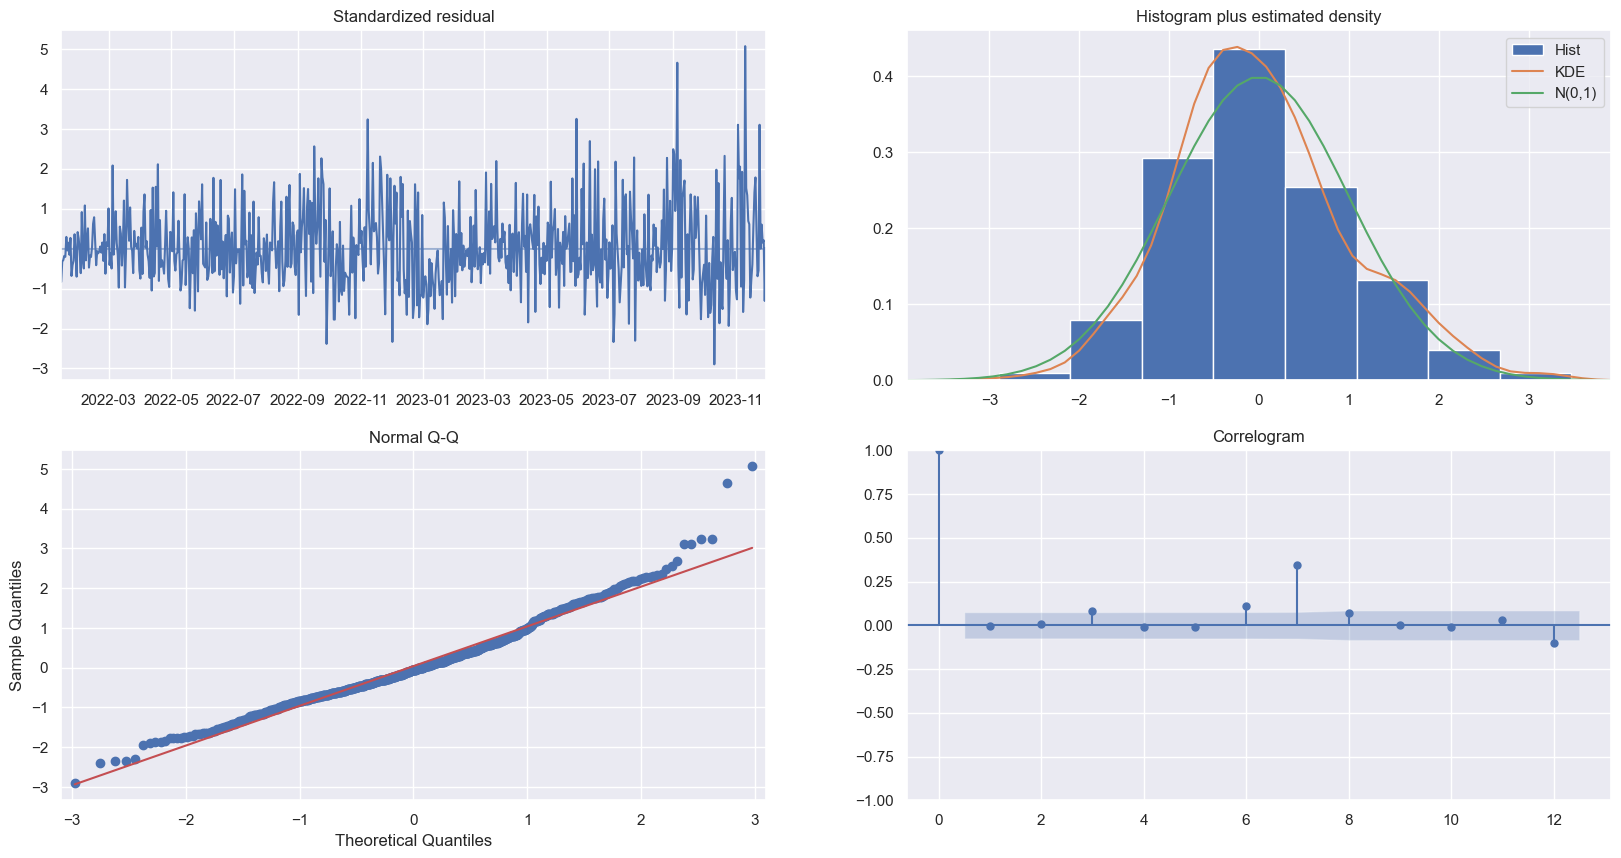

In [30]:
print(arima_model_tuned.plot_diagnostics(lags=12,figsize = (20,10),))

In [31]:
print(len(x_days[train_tune.shape[0]:]), len(valid_tune))


31 31


In [32]:
print("x_axis[train.shape[0]:]:", x_axis[train_tune.shape[0]:].shape)
print("valid:", valid_tune.shape)



x_axis[train.shape[0]:]: (31,)
valid: (31, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

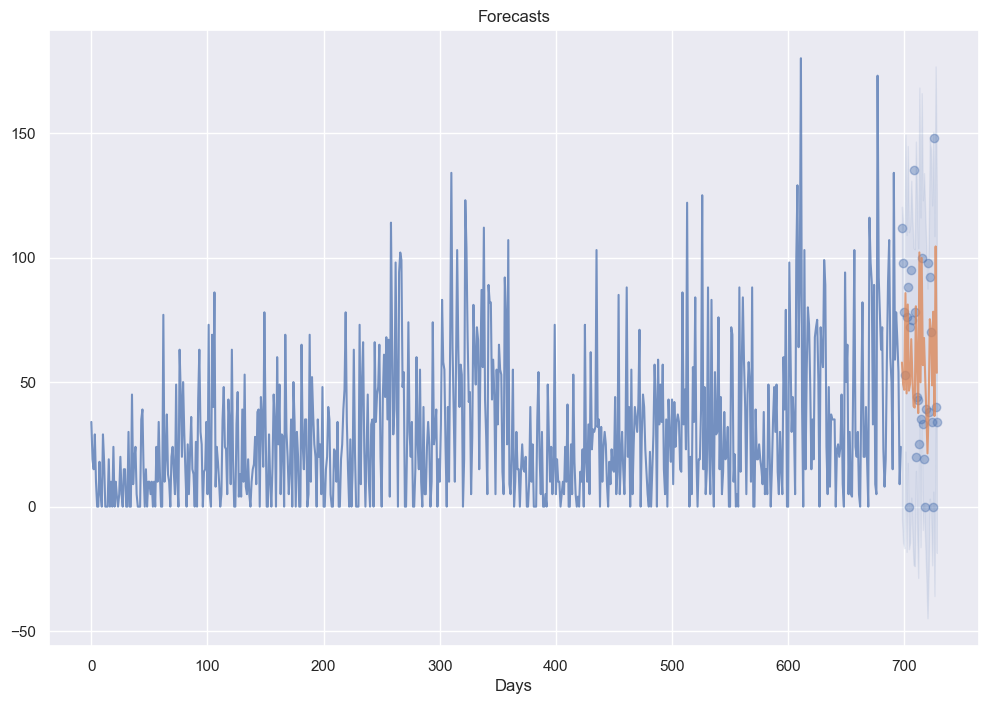

In [33]:
pred_tune, conf_int_t = arima_model_tuned.predict(n_periods=valid_tune.shape[0], return_conf_int=True)
x_axis = np.arange(train_tune.shape[0] + pred_tune.shape[0])
plt.figure(figsize=(12,8))
plt.plot(x_axis[:train_tune.shape[0]], train_tune, alpha=0.75)
plt.plot(x_axis[train_tune.shape[0]:], pred_tune, alpha=0.75)
plt.scatter(
    x_axis[train_tune.shape[0]:],
    valid_tune.values.ravel(),   # ravel() makes it 1‑D
    alpha=0.4,
    marker="o"
)
plt.fill_between(x_axis[-pred_tune.shape[0]:], conf_int_t[:, 0], conf_int_t[:, 1], alpha=0.1, color='b')

plt.title("Forecasts")
plt.xlabel("Days")
plt.savefig('./Images/arima_pridict.png')
plt.show

In [35]:
# Extract the true and predicted values
y_true = valid['Sales'].values
y_pred = valid['Forecast'].values

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Display results in a formatted table
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R²'],
    'Value': [mae, rmse, mape, r2]
})
print(metrics_df)





     Metric      Value
0       MAE  36.769707
1      RMSE  46.817106
2  MAPE (%)        inf
3        R²  -0.513522


C:\Users\DELL\AppData\Local\Temp\ipykernel_22376\3260523809.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


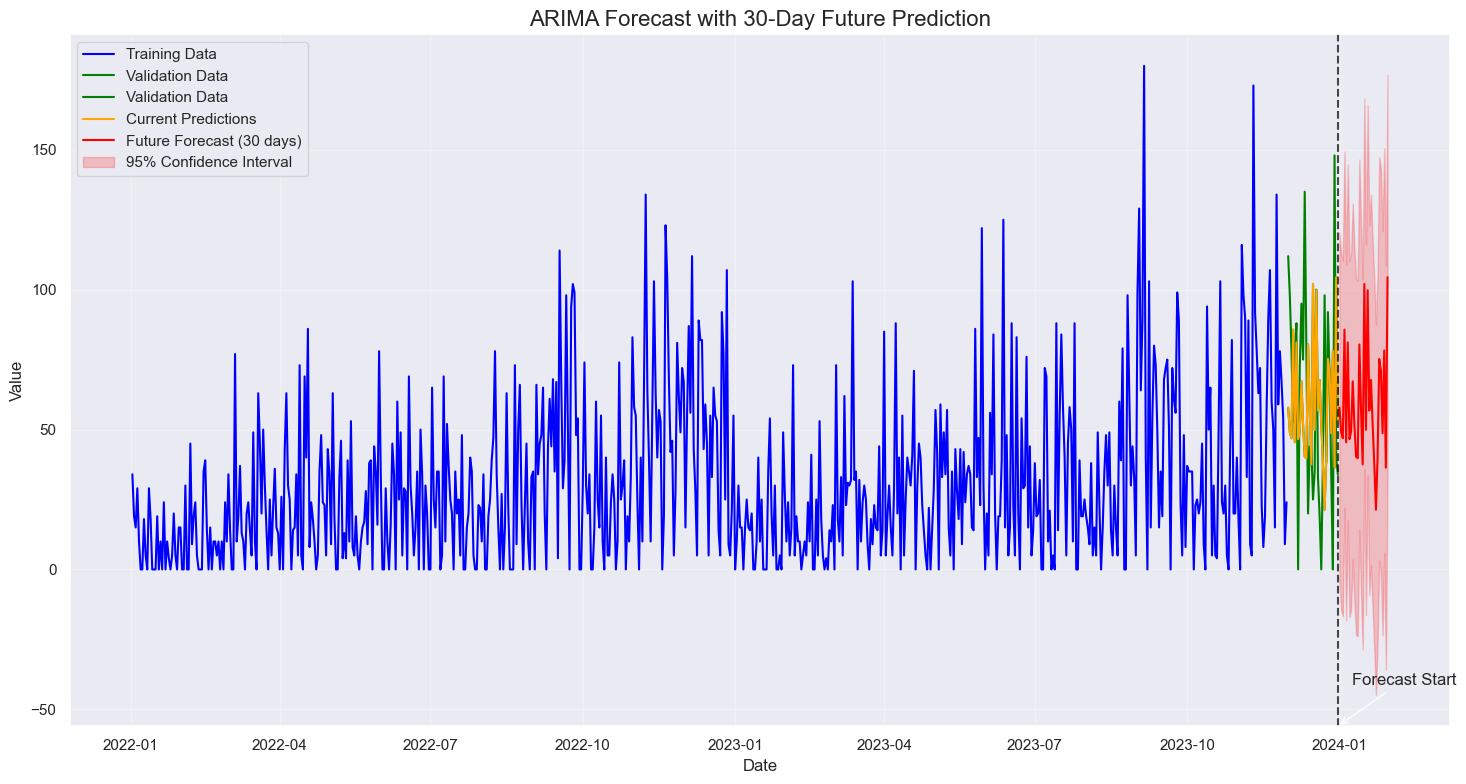

In [37]:
# Get the last date in your data
last_date = df1.index[-1]

# Forecast 30 days into the future
future_forecast, future_conf = arima_model.predict(n_periods=30, return_conf_int=True)

# Create future dates (assuming daily data)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Create a visualization with past and future data
plt.figure(figsize=(15, 8))

# Plot training data
plt.plot(train.index, train, color='blue', label='Training Data')

# Plot validation data
plt.plot(valid.index, valid, color='green', label='Validation Data')

# Plot model fit on validation period
plt.plot(valid.index, pred_tune, color='orange', label='Current Predictions')

# Plot future forecast
plt.plot(future_dates, future_forecast, color='red', label='Future Forecast (30 days)')

# Add confidence intervals for future forecast
plt.fill_between(future_dates, 
                 future_conf[:, 0], 
                 future_conf[:, 1], 
                 color='red', 
                 alpha=0.2, 
                 label='95% Confidence Interval')

# Formatting
plt.title('ARIMA Forecast with 30-Day Future Prediction', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Add vertical line to indicate forecast start
plt.axvline(x=last_date, color='black', linestyle='--', alpha=0.7)
plt.annotate('Forecast Start', 
             xy=(last_date, plt.gca().get_ylim()[0]),
             xytext=(10, 30), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.savefig('./Images/arima_forecast.png')
plt.show()


### **SARIMAX Model**

In [119]:
df = cars_sales_Model[['Date','Price ($)']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')
df['Price ($)'] = df['Price ($)'].ffill()

y = df['Price ($)']

In [120]:
df_sarima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23089 entries, 2022-01-02 to 2023-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price ($)  23089 non-null  float64
dtypes: float64(1)
memory usage: 360.8 KB


In [134]:
model_s = sm.tsa.statespace.SARIMAX(df1['Sales'],order = (1,1,2),seasonal_order = (0,1,0,52))
model_fit_s = model_s.fit()
print(model_fit_s.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  729
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 52)   Log Likelihood               -3438.456
Date:                             Wed, 07 May 2025   AIC                           6884.912
Time:                                     08:10:18   BIC                           6902.977
Sample:                                 01-02-2022   HQIC                          6891.906
                                      - 12-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8058      0.059    -13.641      0.000      -0.922      -0.690
ma.L1          0.0002      

In [ ]:
model_sarima = sm.tsa.statespace.SARIMAX(
    y,
    order=(1, 1, 2),
    seasonal_order=(1, 1, 1, 12),
    trend='c'  
)
sarima_res = model_sarima.fit(disp=False, smooth=False, low_memory=True)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: smooth. After release 0.14, this will raise

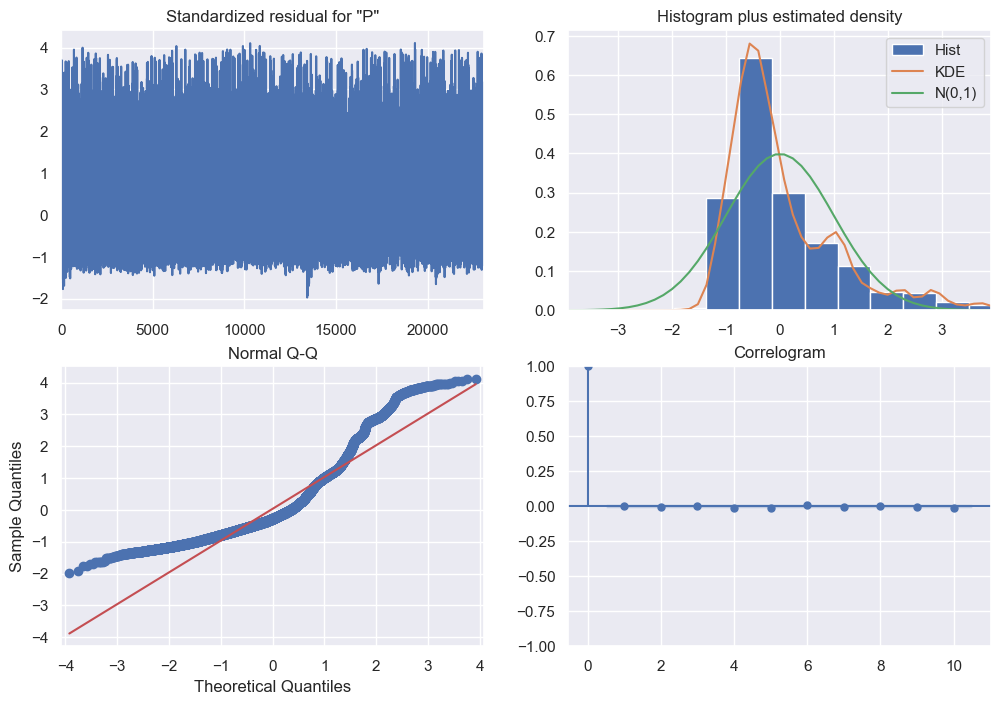

In [123]:
sarima_res.plot_diagnostics(figsize=(12,8))
plt.show()

In [124]:
forecast_steps = 30
pred_sarima = sarima_res.get_forecast(steps=forecast_steps)
forecast_sarima = pred_sarima.predicted_mean
conf_int = pred_sarima.conf_int()


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [125]:
last_date = df_sarima.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

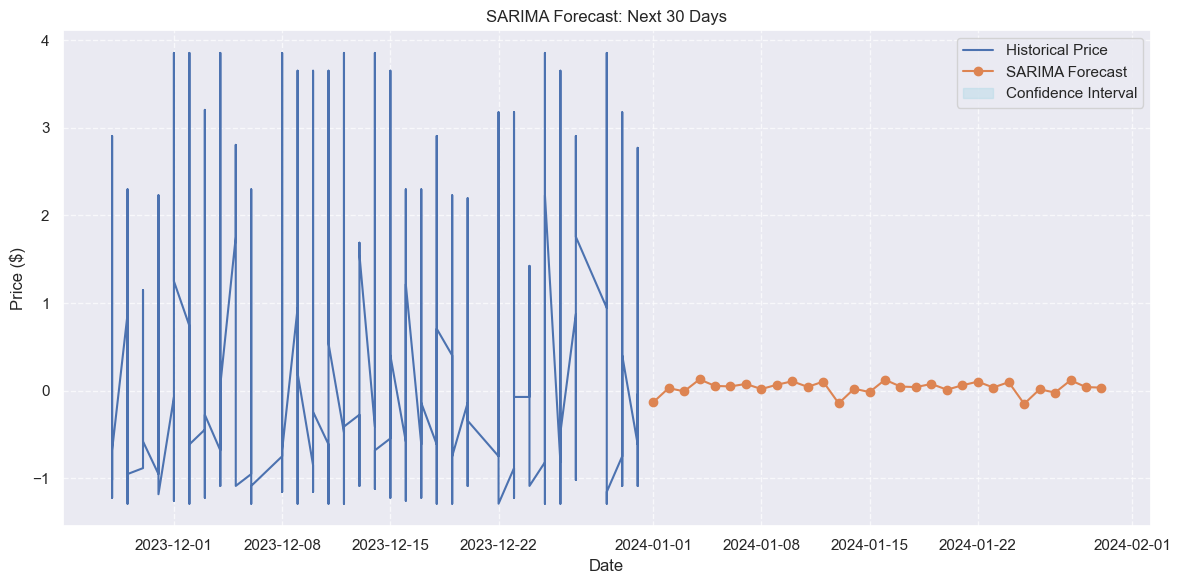

In [133]:

plt.figure(figsize=(12,6))
plt.plot(y.index[-2000:], y.values[-2000:], label='Historical Price')
plt.plot(future_dates, forecast_sarima.values, label='SARIMA Forecast', marker='o')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightblue', alpha=0.4, label='Confidence Interval')
plt.title('SARIMA Forecast: Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Images/sarima_forcast.png')
plt.show()

In [67]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'SARIMA Forecasted Price ($)': forecast_sarima.values,
    'Lower CI': conf_int.iloc[:, 0].values,
    'Upper CI': conf_int.iloc[:, 1].values
})
print(forecast_df)

         Date  SARIMA Forecasted Price ($)  Lower CI   Upper CI
0  2024-01-01                    -0.219187 -3.323999   2.885624
1  2024-01-02                     1.485243 -1.695204   4.665689
2  2024-01-03                    -0.308348 -3.585453   2.968756
3  2024-01-04                    -0.351928 -3.721941   3.018085
4  2024-01-05                    -0.098657 -3.559125   3.361811
5  2024-01-06                     0.474931 -3.073685   4.023547
6  2024-01-07                     0.100792 -3.533836   3.735419
7  2024-01-08                    -0.341144 -4.287333   3.605045
8  2024-01-09                     1.997164 -2.062413   6.056740
9  2024-01-10                    -0.273899 -4.449404   3.901606
10 2024-01-11                    -0.186006 -4.474076   4.102065
11 2024-01-12                     0.410823 -3.986942   4.808589
12 2024-01-13                     0.238080 -4.266709   4.742869
13 2024-01-14                     0.123009 -4.486320   4.732337
14 2024-01-15                    -0.2293

### **LSTM Model** 

In [46]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation='tanh',
        input_shape=(SEQ_LEN, 1),
        return_sequences=False
    ))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse'
    )
    return model

In [47]:
df_lstm = cars_sales_Model[['Date', 'Price ($)']].copy()
df_lstm = df_lstm.sort_values('Date')
df_lstm = df_lstm.dropna(subset=['Date', 'Price ($)'])
df_lstm.set_index('Date', inplace=True)

In [48]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df_lstm[['Price ($)']]) 
scaled_prices.dump('./Assisting/scaled_prices.pkl')

In [49]:
SEQ_LEN = 30  
X, y = create_sequences(scaled_prices, SEQ_LEN)

In [50]:
split = int(0.8 * len(X))
X_train_l, X_test_l = X[:split], X[split:]
y_train_l, y_test_l = y[:split], y[split:]

Tune it 

In [51]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='lstm_price_forecast'
)

In [52]:
tuner.search(X_train_l, y_train_l, epochs=10, validation_split=0.2, verbose=1)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 04m 12s]
val_loss: 0.029561955481767654

Best val_loss So Far: 0.029542382806539536
Total elapsed time: 00h 17m 21s


In [53]:
history = best_model.fit(X_train_l, y_train_l, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
462/462 [==============================] - 16s 22ms/step - loss: 0.0309 - val_loss: 0.0296
Epoch 2/20
462/462 [==============================] - 10s 22ms/step - loss: 0.0309 - val_loss: 0.0299
Epoch 3/20
462/462 [==============================] - 12s 27ms/step - loss: 0.0309 - val_loss: 0.0296
Epoch 4/20
462/462 [==============================] - 13s 29ms/step - loss: 0.0308 - val_loss: 0.0296
Epoch 5/20
462/462 [==============================] - 14s 30ms/step - loss: 0.0309 - val_loss: 0.0297
Epoch 6/20
462/462 [==============================] - 11s 23ms/step - loss: 0.0308 - val_loss: 0.0299
Epoch 7/20
462/462 [==============================] - 14s 30ms/step - loss: 0.0308 - val_loss: 0.0295
Epoch 8/20
462/462 [==============================] - 10s 21ms/step - loss: 0.0309 - val_loss: 0.0299
Epoch 9/20
462/462 [==============================] - 9s 20ms/step - loss: 0.0309 - val_loss: 0.0295
Epoch 10/20
462/462 [==============================] - 9s 20ms/step - loss: 0.0308 

In [54]:
last_sequence = scaled_prices[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)
forecast_scaled = []
current_seq = last_sequence.copy()
for _ in range(30):
    pred_l = best_model.predict(current_seq)[0,0]
    forecast_scaled.append(pred_l)
    # Append prediction and slide window
    current_seq = np.append(current_seq[:,1:,:], [[[pred_l]]], axis=1)
forecast_prices_l= scaler.inverse_transform(np.array(forecast_scaled).reshape(-1,1)).flatten()


1/1 [==============================] - 2s 2s/step


In [55]:
y_test_pred_l = best_model.predict(X_test_l)
y_test_pred_inv_l = scaler.inverse_transform(y_test_pred_l)
y_test_inv_l = scaler.inverse_transform(y_test_l)

145/145 [==============================] - 2s 12ms/step


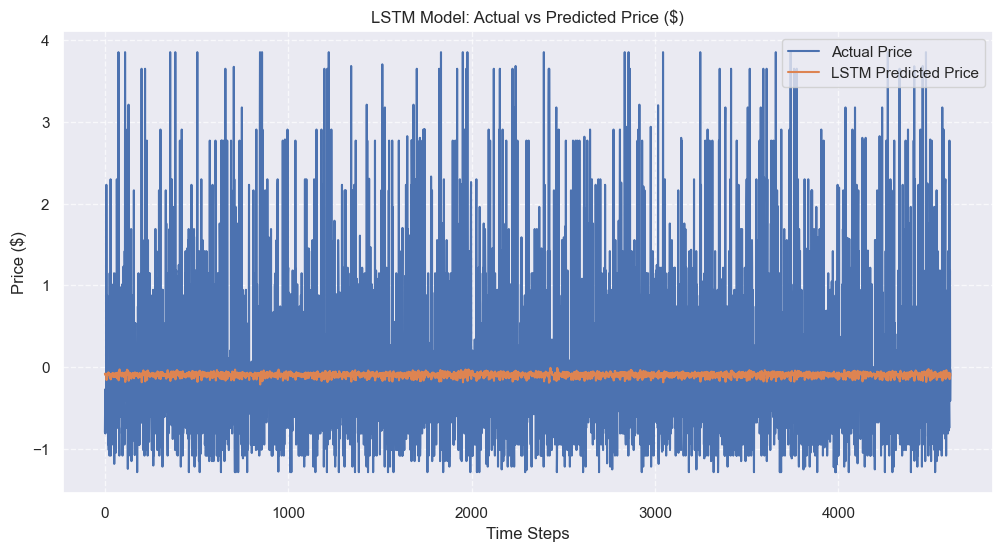

In [56]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test_inv_l)), y_test_inv_l, label='Actual Price')
plt.plot(range(len(y_test_pred_inv_l)), y_test_pred_inv_l, label='LSTM Predicted Price')
plt.title('LSTM Model: Actual vs Predicted Price ($)')
plt.xlabel('Time Steps')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./Images/lstm_model.png')
plt.show()


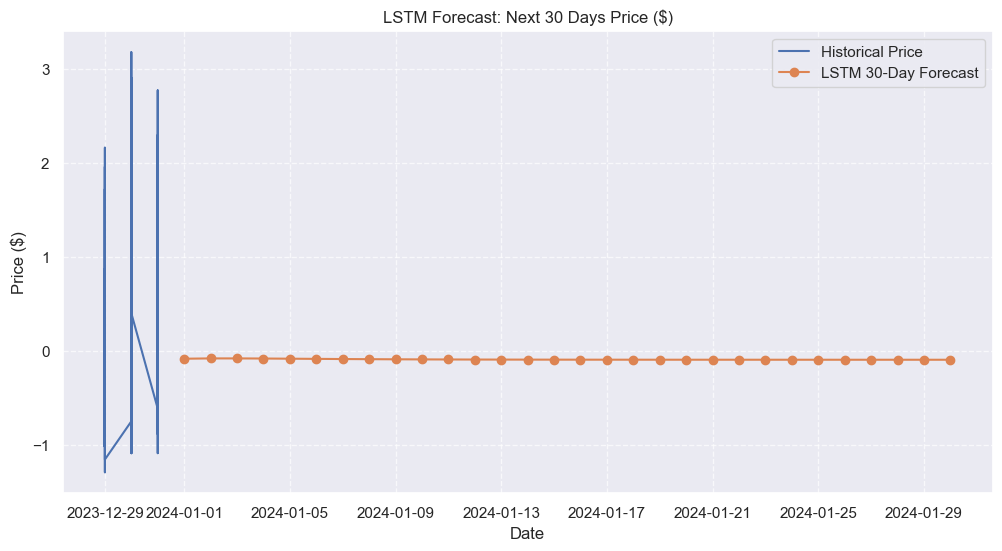

In [57]:
future_dates = pd.date_range(df_lstm.index[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(12,6))
plt.plot(df_lstm.index[-100:], df_lstm['Price ($)'].values[-100:], label='Historical Price')
plt.plot(future_dates, forecast_prices_l, label='LSTM 30-Day Forecast', marker='o')
plt.title('LSTM Forecast: Next 30 Days Price ($)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./Images/lstm_forecast.png')
plt.show()

In [58]:
forecast_df_l = pd.DataFrame({'Date': future_dates, 'Forecasted Price ($)': forecast_prices_l})
print("LSTM Forecasted Price ($) for the Next 30 Days:")
display(forecast_df_l)

LSTM Forecasted Price ($) for the Next 30 Days:


Date  Forecasted Price ($)
0  2024-01-01             -0.082283
1  2024-01-02             -0.078976
2  2024-01-03             -0.078963
3  2024-01-04             -0.080200
4  2024-01-05             -0.081968
5  2024-01-06             -0.083864
6  2024-01-07             -0.085632
7  2024-01-08             -0.087165
8  2024-01-09             -0.088444
9  2024-01-10             -0.089483
10 2024-01-11             -0.090312
11 2024-01-12             -0.090972
12 2024-01-13             -0.091469
13 2024-01-14             -0.091857
14 2024-01-15             -0.092150
15 2024-01-16             -0.092385
16 2024-01-17             -0.092577
17 2024-01-18             -0.092703
18 2024-01-19             -0.092829
19 2024-01-20             -0.092903
20 2024-01-21             -0.092959
21 2024-01-22             -0.093003
22 2024-01-23             -0.093059
23 2024-01-24             -0.093085
24 2024-01-25             -0.093101
25 2024-01-26             -0.093156
26 2024-01-27             -0.093162
27 2024-01-28             -0.093172
28 2024-01-29             -0.093195
29 2024-01-30             -0.093194

### **XGBoost with Prophet**  <a class="anchor" id="XGBoost"></a>

In [72]:
df = joblib.load('./Data/dataModeling.pkl')
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df.fillna(method='bfill', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_22376\181056697.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [73]:
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  
joblib.dump(scaler,'./Assisting/scaler_xgboost.pkl')

['./Assisting/scaler_xgboost.pkl']

In [76]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=300,
    subsample=0.9,
    random_state=42
)
#Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

In [77]:
print('start fitting the train xgboost model and predicting testing....')
xgb.fit(X_train_scaled, y_train)
predictions_xgb = xgb.predict(X_test_scaled)
print('xgboost model fitted and prediction done')

start fitting the train xgboost model and predicting testing....
xgboost model fitted and prediction done


In [78]:

mae = mean_absolute_error(y_test,predictions_xgb )
rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))
r2 = r2_score(y_test, predictions_xgb)
print(f"XGBoost MAE (Test Set): {mae:.6f}")
print(f"XGBoost MAE (Train Set): {mean_absolute_error(y_train, xgb.predict(X_train_scaled)):.6f}")
print(f"XGBoost RMSE (Test Set): {rmse:.6f}")
print(f"XGBoost RMSE (Train Set): {np.sqrt(mean_squared_error(y_train, xgb.predict(X_train_scaled))):.6f}")
print(f"XGBoost R² (Test Set): {r2:.6f}")
print(f"XGBoost R2 (Train Set): {r2_score(y_train, xgb.predict(X_train_scaled)):.6f}")


XGBoost MAE (Test Set): 0.086103
XGBoost MAE (Train Set): 0.013099
XGBoost RMSE (Test Set): 0.138564
XGBoost RMSE (Train Set): 0.018245
XGBoost R² (Test Set): 0.980819
XGBoost R2 (Train Set): 0.999667


In [79]:
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb, X_scaled, y, cv=tscv, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f"TimeSeriesSplit CV MAE: {cv_mae:.6f}")
print(f"Cross-Validation MAE: {cv_mae:.6f}")
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean()):.6f}")
print(f"Cross-Validation R2: {cv_scores.mean():.6f}")

TimeSeriesSplit CV MAE: 0.128857
Cross-Validation MAE: 0.128857
Cross-Validation RMSE: 0.358966
Cross-Validation R2: -0.128857


In [80]:
# Walk-forward validation
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X_scaled):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)
    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))
print(f"Walk-Forward MAE: {np.mean(mae_scores):.6f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.6f}")
print(f"Walk-Forward R2: {r2_score(y, xgb.predict(X)):.6f}")

Walk-Forward MAE: 0.128857
Walk-Forward RMSE: 0.204267
Walk-Forward R2: -0.028964


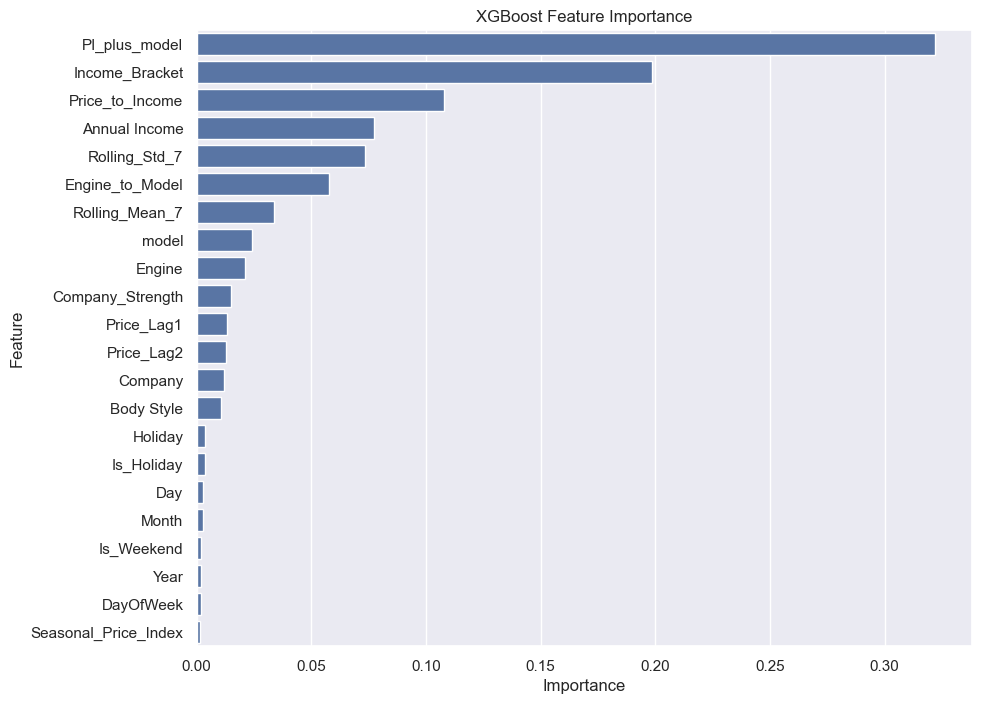

In [81]:
# Feature importance plot
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.savefig('./Images/feature_importance.png')
plt.show()

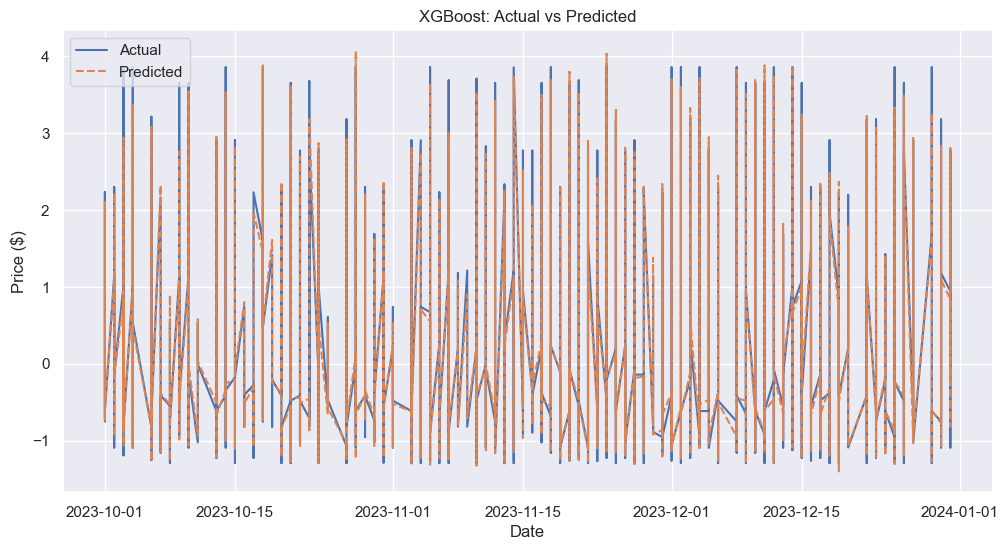

In [82]:


# Actual vs Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], predictions_xgb, label='Predicted', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('./Images/actual_vs_predicted.png')
plt.show()

In [83]:
# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))
ensemble_predictions = (predictions_xgb + hw_forecast) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble MAE: {ensemble_mae:.6f}")
print(f"Ensemble RMSE: {ensemble_rmse:.6f}")

Ensemble MAE: 18.071056
Ensemble RMSE: 18.833382


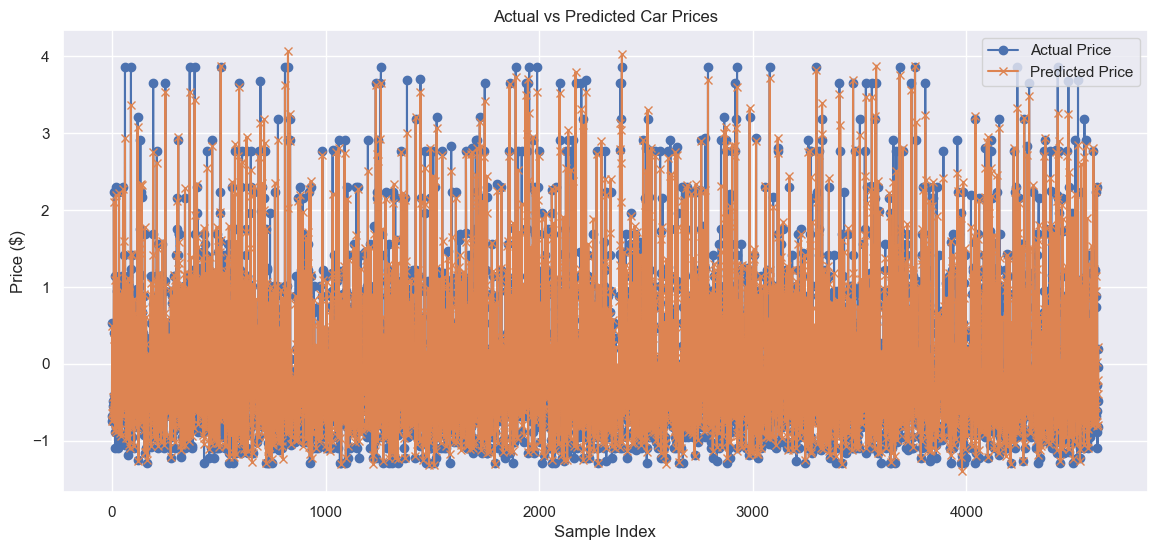

In [84]:
# Actual vs Predicted Visualization
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(predictions_xgb, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('./Images/Actual_vs_Predicted2.png')
plt.show()

### **Compare**

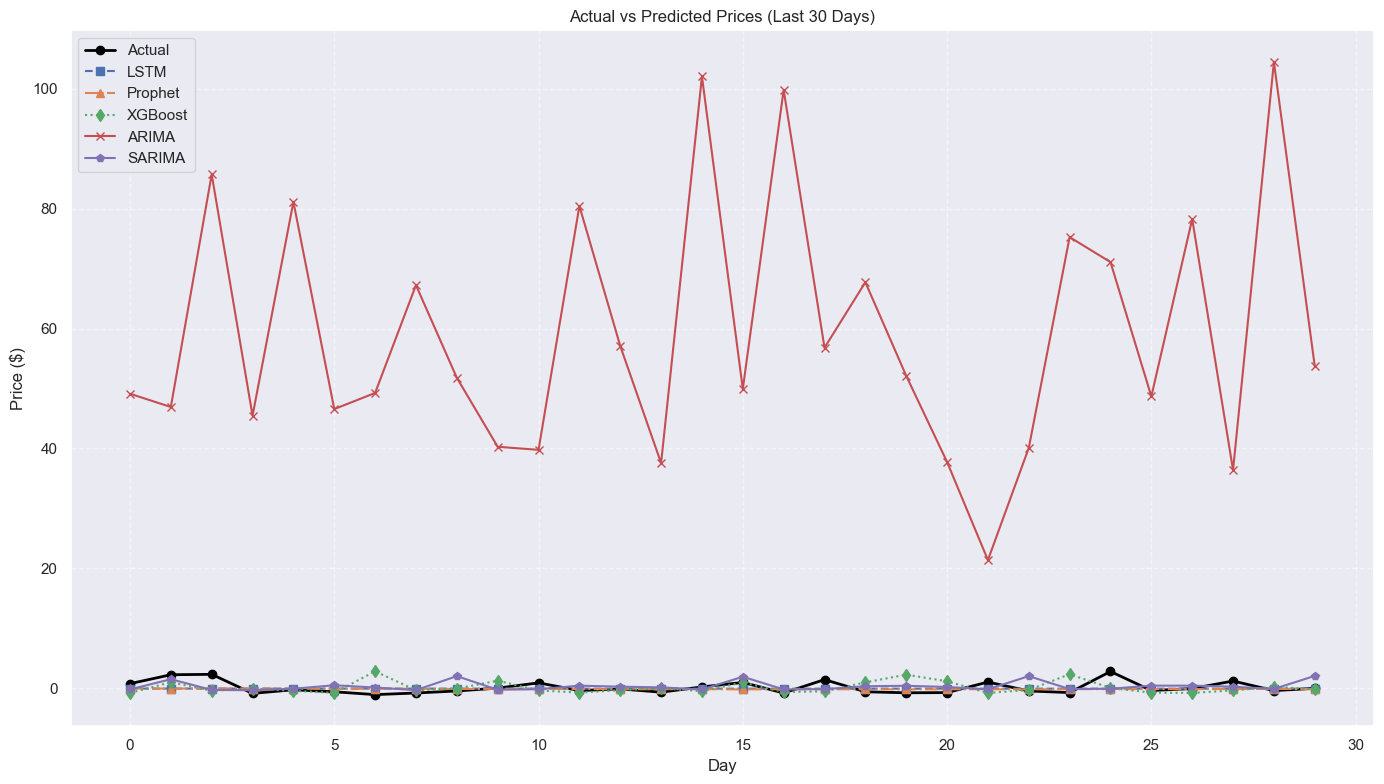

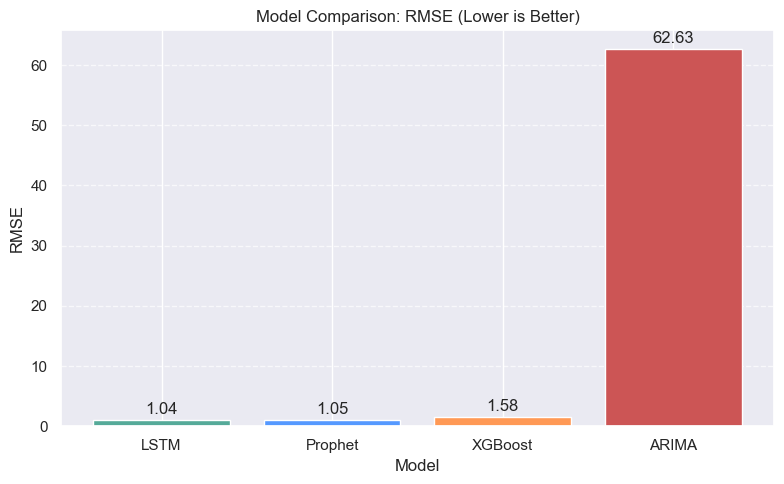

In [111]:
actual_30 = df_lstm['Price ($)'].iloc[-30:].values
lstm_pred_30 = forecast_prices_l  
prophet_pred_30 = forecast_p['yhat'].tail(30).values
xgb_pred_30 = predictions_xgb[-30:]    
arima_pred_30 = pred_arima.tail(30).values if isinstance(pred_arima, pd.Series) else pred_arima['yhat'].tail(30).values
pred_sarima_30 = pred_sarima.predicted_mean.values[-30:]


def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

results = []
# LSTM
rmse_lstm, mae_lstm = calc_metrics(actual_30, lstm_pred_30)
results.append({'Model': 'LSTM', 'RMSE': rmse_lstm, 'MAE': mae_lstm})
# Prophet
rmse_prophet, mae_prophet = calc_metrics(actual_30, prophet_pred_30)
results.append({'Model': 'Prophet', 'RMSE': rmse_prophet, 'MAE': mae_prophet})
# XGBoost
rmse_xgb, mae_xgb = calc_metrics(actual_30, xgb_pred_30)
results.append({'Model': 'XGBoost', 'RMSE': rmse_xgb, 'MAE': mae_xgb})
# ARIMA
rmse_arima, mae_arima = calc_metrics(actual_30, arima_pred_30)
results.append({'Model': 'ARIMA', 'RMSE': rmse_arima, 'MAE': mae_arima})
results_df = pd.DataFrame(results)
#SARIMA
rmse_sarima, mae_sarima = calc_metrics(actual_30, pred_sarima_30)
results.append({'Model': 'SARIMA', 'RMSE': rmse_sarima, 'MAE': mae_sarima})


plt.figure(figsize=(14, 8))
plt.plot(range(30), actual_30, label='Actual', color='black', linewidth=2, marker='o')
plt.plot(range(30), lstm_pred_30, label='LSTM', linestyle='--', marker='s')
plt.plot(range(30), prophet_pred_30, label='Prophet', linestyle='-.', marker='^')
plt.plot(range(30), xgb_pred_30, label='XGBoost', linestyle=':', marker='d')
plt.plot(range(30), arima_pred_30, label='ARIMA', linestyle='-', marker='x')
plt.plot(range(30), pred_sarima_30, label='SARIMA', linestyle='-', marker='p')
plt.title('Actual vs Predicted Prices (Last 30 Days)')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('./Images/Comparison_Actul_vs_Predicted.png')
plt.show()


plt.figure(figsize=(8, 5))
bars = plt.bar(results_df['Model'], results_df['RMSE'], color=['#5A9', '#59F', '#F95', '#C55', '#5C5'])
plt.title('Model Comparison: RMSE (Lower is Better)')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.savefig('./Images/ComparisonRMS.png')
plt.show()


In [112]:
print("Model Performance Comparison (Last 30 Days):")
display(results_df)

Model Performance Comparison (Last 30 Days):


Model       RMSE        MAE
0     LSTM   1.043610   0.786287
1  Prophet   1.051640   0.777756
2  XGBoost   1.578185   1.190723
3    ARIMA  62.630729  59.014711

# **Save the best model**

In [ ]:
joblib.dump(Random_Forest_Regressor, './Models/Random_Forest_Regressor.pkl')
joblib.dump(xgb,'./Models/xgb_forcasting_model.pkl')
joblib.dump(arima_model,'./Models/arima_model.pkl')
joblib.dump(model_sarima,'./Models/sarima_model.pkl')
joblib.dump(model_prophet,'./Models/prophet_model.pkl')
joblib.dump(final_model,'./Models/DecisionTree_model.pkl')



['./Models/arima_model.pkl']

# **Final Conclusion: Best Model and Justification**
**Best Model: Random Forest (RF)**
Why Random Forest is the Best Overall:

**Highest Accuracy:**
Random Forest achieves the highest R² of 0.9973, indicating that it explains the most variance in the target variable compared to other models. This makes it the most accurate model in terms of predicting your dataset.

**Lowest Error Metrics:**
Random Forest has the lowest MAE (0.0147) and MAPE (0.0588), which means it makes fewer errors in its predictions and has the most consistent accuracy. Additionally, it ties for the lowest MSE (0.0027), further reinforcing its precision.

**Stable Performance:**
Random Forest consistently outperforms other models across multiple folds during cross-validation, demonstrating its robust generalization ability. This suggests it performs reliably on unseen data, avoiding overfitting and underfitting.

**Feature Importance:**
Random Forest also provides valuable insights into feature importance, which is useful for understanding which features have the most impact on predictions. This can be crucial for decision-making, especially in applications where model interpretability is important.



# 


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(4, 88, 140);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
